In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''
print('done')

done


In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime
import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

# Import Data

แปลง DOB และ System Car Code Date ให้เป็น วัน

In [8]:
df = pd.read_excel('Data20230120.xlsx', parse_dates=['DOB','System CAR Code Date'])
df.head()

Application Number  Principal Approve Amount  Principal Amount  \
0  25651226INSI00001                    7500.0              0.00   
1  25650620ULMB00004                   20000.0          13492.22   
2  25650620ULCR00002                  130000.0         125931.40   
3  25650621ULMB00001                   70000.0          60867.83   
4  25650621ULMB00011                    3000.0           1585.66   

   Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                            12      M 1992-12-05          พนักงานบริษัท   
1                            12      M 1986-08-15                  อื่นๆ   
2                            60      F 1996-04-30                  อื่นๆ   
3                            36      M 1979-04-01                  อื่นๆ   
4                            13      M 1967-05-04          STREET VENDOR   

   Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                     10000.00                   PU        TOYOTA   
1                     25000.09                   MC         HONDA   
2                     15000.00                  CAR         HONDA   
3                     20000.00                   MC        YAMAHA   
4                     30000.00                   MC         HONDA   

   Vehicle Model  Vehicle Release Year Vehicle Sub Model  Evaluation Amount  \
0  SPORT CRUISER                  2002                EP             225500   
1        PCX 160                  2018                BV              64500   
2          CIVIC                  2005                DK             220500   
3      N-MAX 155                  2021                CE              81500   
4     WAVE 125 I                  2010                AY              20000   

  System CAR Code (Daily) System CAR Code Date Final CAR Code Previous Month  \
0                      S1           2022-12-26                            S1   
1                      S1           2022-06-20                            S1   
2                      S1           2022-06-20                            S1   
3                      S1           2022-06-21                            S1   
4                      S1           2022-06-21                            S1   

   Day Past Due (Aging)     Application Status  
0                     4  APPLICATION_COMPLETED  
1                     0  APPLICATION_COMPLETED  
2                     0  APPLICATION_COMPLETED  
3                     0  APPLICATION_COMPLETED  
4                     0  APPLICATION_COMPLETED

In [9]:
df.shape

(53496, 19)

In [10]:
df['Collateral Type Code'].value_counts()

MC       25978
PU       14489
CAR      12330
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53496 entries, 0 to 53495
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Number             53496 non-null  object        
 1   Principal Approve Amount       53496 non-null  float64       
 2   Principal Amount               53496 non-null  float64       
 3   Repayment Tenor Month Number   53496 non-null  int64         
 4   Gender                         53496 non-null  object        
 5   DOB                            53496 non-null  datetime64[ns]
 6   Occupation Description         53496 non-null  object        
 7   Total Income Amount (Month)    53496 non-null  float64       
 8   Collateral Type Code           53496 non-null  object        
 9   Vehicle Brand                  53496 non-null  object        
 10  Vehicle Model                  53496 non-null  object        
 11  Vehicle Release

In [12]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                  53496.00          53496.00   
mean                  101640.79          98746.29   
std                   101697.95         101152.59   
min                     3000.00          -2253.34   
25%                    26000.00          24900.00   
50%                    48000.00          40884.99   
75%                   165000.00         160000.00   
max                  2000000.00        2000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                      53496.00                     53496.00   
mean                          39.39                     25084.92   
std                           17.98                    114036.90   
min                            1.00                         0.00   
25%                           24.00                     15000.00   
50%                           36.00                     20000.00   
75%                           60.00                     30000.00   
max                          120.00                  20000000.00   

       Vehicle Release Year  Evaluation Amount  Day Past Due (Aging)  
count              53496.00           53496.00              53496.00  
mean                2012.50          164745.58                  1.13  
std                    5.52          159732.24                  7.42  
min                 1976.00            5000.00                  0.00  
25%                 2008.00           38900.00                  0.00  
50%                 2013.00          117000.00                  0.00  
75%                 2017.00          261125.00                  0.00  
max                 2022.00         3282500.00                147.00

#Data Preparation

##แปลงชื่อ Columns และ แปลง DOB เป็น อายุ

In [13]:
df.rename(columns={'Day Past Due (Aging)':'DPD'}, inplace=True)
df['age'] = pd.to_datetime('today').year - df.DOB.dt.year

##คำนวณ % ของค่าว่าง

In [14]:
df.columns

Index(['Application Number', 'Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age'],
      dtype='object')

In [15]:
df = df.drop_duplicates('Application Number')
df.shape

(53423, 20)

In [16]:
df = df.drop(['Application Number'], axis=1)
df.head()

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                    7500.0              0.00                            12   
1                   20000.0          13492.22                            12   
2                  130000.0         125931.40                            60   
3                   70000.0          60867.83                            36   
4                    3000.0           1585.66                            13   

  Gender        DOB Occupation Description  Total Income Amount (Month)  \
0      M 1992-12-05          พนักงานบริษัท                     10000.00   
1      M 1986-08-15                  อื่นๆ                     25000.09   
2      F 1996-04-30                  อื่นๆ                     15000.00   
3      M 1979-04-01                  อื่นๆ                     20000.00   
4      M 1967-05-04          STREET VENDOR                     30000.00   

  Collateral Type Code Vehicle Brand  Vehicle Model  Vehicle Release Year  \
0                   PU        TOYOTA  SPORT CRUISER                  2002   
1                   MC         HONDA        PCX 160                  2018   
2                  CAR         HONDA          CIVIC                  2005   
3                   MC        YAMAHA      N-MAX 155                  2021   
4                   MC         HONDA     WAVE 125 I                  2010   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                EP             225500                      S1   
1                BV              64500                      S1   
2                DK             220500                      S1   
3                CE              81500                      S1   
4                AY              20000                      S1   

  System CAR Code Date Final CAR Code Previous Month  DPD  \
0           2022-12-26                            S1    4   
1           2022-06-20                            S1    0   
2           2022-06-20                            S1    0   
3           2022-06-21                            S1    0   
4           2022-06-21                            S1    0   

      Application Status  age  
0  APPLICATION_COMPLETED   31  
1  APPLICATION_COMPLETED   37  
2  APPLICATION_COMPLETED   27  
3  APPLICATION_COMPLETED   44  
4  APPLICATION_COMPLETED   56

In [17]:
missing = df.isnull().sum()
missing

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

In [18]:
missing = df.isnull().sum()
missing

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

In [19]:
df.dropna(subset=['Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year','Evaluation Amount'], inplace=True)

In [20]:
df.isnull().sum()

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
dtype: int64

In [21]:
missing_columns = list(missing[missing > 0].index)
missing_columns

[]

In [22]:
total_missing = missing[missing > 0]
total_missing

Series([], dtype: int64)

In [23]:
missing_df = pd.DataFrame(total_missing, columns=['number_of_missing_values'])
missing_df

Empty DataFrame
Columns: [number_of_missing_values]
Index: []

In [24]:
missing_df['percent'] = total_missing * 100 / len(df)
missing_df

Empty DataFrame
Columns: [number_of_missing_values, percent]
Index: []

In [25]:
'''df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',
                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',
                  'Vehicle Sub Model','Evaluation Amount','DPD'], inplace=True)'''

"df.dropna(subset=['Principal Approve Amount','Principal Amount','Outstanding Balance Amount',\n                  'Repayment Tenor Month Number','Collateral Type Code','Vehicle Brand','Vehicle Model','Vehicle Release Year',\n                  'Vehicle Sub Model','Evaluation Amount','DPD'], inplace=True)"

In [26]:
# df[ (df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')]

In [27]:
# indexApp = df[(df['Collateral Type Code'] != 'CAR')&(df['Collateral Type Code'] != 'PU')&(df['Collateral Type Code'] != 'MC')].index
# df.drop(indexApp , inplace=True)

In [28]:
df.shape

(53423, 19)

In [29]:
#เพิ่ม column อายุรถ
df['Vehicle Age'] = pd.to_datetime('today').year - df['Vehicle Release Year']
df

Principal Approve Amount  Principal Amount  \
0                        7500.0              0.00   
1                       20000.0          13492.22   
2                      130000.0         125931.40   
3                       70000.0          60867.83   
4                        3000.0           1585.66   
...                         ...               ...   
53491                   40000.0          37993.41   
53492                  140000.0         140000.00   
53493                   61800.0          61800.00   
53494                  180000.0         180000.00   
53495                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                                12      M 1992-12-05          พนักงานบริษัท   
1                                12      M 1986-08-15                  อื่นๆ   
2                                60      F 1996-04-30                  อื่นๆ   
3                                36      M 1979-04-01                  อื่นๆ   
4                                13      M 1967-05-04          STREET VENDOR   
...                             ...    ...        ...                    ...   
53491                            24      M 1977-02-25                เกษตรกร   
53492                            60      M 1965-06-30                เกษตรกร   
53493                            36      F 1983-11-21          STREET VENDOR   
53494                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53495                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         10000.00                   PU        TOYOTA   
1                         25000.09                   MC         HONDA   
2                         15000.00                  CAR         HONDA   
3                         20000.00                   MC        YAMAHA   
4                         30000.00                   MC         HONDA   
...                            ...                  ...           ...   
53491                     60000.00                   MC         HONDA   
53492                     24500.00                   PU         ISUZU   
53493                     45000.00                   MC         HONDA   
53494                     32000.00                   PU         MAZDA   
53495                     60000.00                  CAR         HONDA   

       Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0      SPORT CRUISER                  2002                EP   
1            PCX 160                  2018                BV   
2              CIVIC                  2005                DK   
3          N-MAX 155                  2021                CE   
4         WAVE 125 I                  2010                AY   
...              ...                   ...               ...   
53491     WAVE 125 I                  2022                CP   
53492          D-MAX                  2006                CU   
53493        PCX 160                  2021                BQ   
53494       BT-50PRO                  2012                AL   
53495           JAZZ                  2005                BJ   

       Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                 225500                      S1           2022-12-26   
1                  64500                      S1           2022-06-20   
2                 220500                      S1           2022-06-20   
3                  81500                      S1           2022-06-21   
4                  20000                      S1           2022-06-21   
...                  ...                     ...                  ...   
53491              53000                      S1           2022-12-31   
53492             176000                      S1           2022-12-31   
53493              82500                      S1           2022-12-31   
53494             280000         

In [30]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [31]:
# df[df['Application Number'].duplicated()]

In [32]:
# df.drop_duplicates(['Application Number'], inplace=True)

# df.reset_index(drop=True, inplace=True)

In [33]:
# df['Insurance Policy Number'].fillna(0, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53423 entries, 0 to 53495
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       53423 non-null  float64       
 1   Principal Amount               53423 non-null  float64       
 2   Repayment Tenor Month Number   53423 non-null  int64         
 3   Gender                         53423 non-null  object        
 4   DOB                            53423 non-null  datetime64[ns]
 5   Occupation Description         53423 non-null  object        
 6   Total Income Amount (Month)    53423 non-null  float64       
 7   Collateral Type Code           53423 non-null  object        
 8   Vehicle Brand                  53423 non-null  object        
 9   Vehicle Model                  53423 non-null  object        
 10  Vehicle Release Year           53423 non-null  int64         
 11  Vehicle Sub Mod

In [35]:
df.isna().sum()

Principal Approve Amount         0
Principal Amount                 0
Repayment Tenor Month Number     0
Gender                           0
DOB                              0
Occupation Description           0
Total Income Amount (Month)      0
Collateral Type Code             0
Vehicle Brand                    0
Vehicle Model                    0
Vehicle Release Year             0
Vehicle Sub Model                0
Evaluation Amount                0
System CAR Code (Daily)          0
System CAR Code Date             0
Final CAR Code Previous Month    0
DPD                              0
Application Status               0
age                              0
Vehicle Age                      0
dtype: int64

In [36]:
'''df['Gender'] = df['Gender'].fillna(method='ffill')'''

"df['Gender'] = df['Gender'].fillna(method='ffill')"

In [37]:
df['Repayment Tenor Month Number']=df['Repayment Tenor Month Number'].astype(int)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(int)
df['DPD']=df['DPD'].astype(np.int64)
df['Vehicle Release Year']=df['Vehicle Release Year'].astype(np.int64)
df['Vehicle Age']=df['Vehicle Age'].astype(np.int64)

In [38]:
print(df.shape)
df.tail()

(53423, 20)


Principal Approve Amount  Principal Amount  \
53491                   40000.0          37993.41   
53492                  140000.0         140000.00   
53493                   61800.0          61800.00   
53494                  180000.0         180000.00   
53495                  123000.0         123000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
53491                            24      M 1977-02-25                เกษตรกร   
53492                            60      M 1965-06-30                เกษตรกร   
53493                            36      F 1983-11-21          STREET VENDOR   
53494                            60      M 1974-07-28     พนักงานรัฐวิสาหกิจ   
53495                            60      M 1990-10-15                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
53491                      60000.0                   MC         HONDA   
53492                      24500.0                   PU         ISUZU   
53493                      45000.0                   MC         HONDA   
53494                      32000.0                   PU         MAZDA   
53495                      60000.0                  CAR         HONDA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
53491    WAVE 125 I                  2022                CP   
53492         D-MAX                  2006                CU   
53493       PCX 160                  2021                BQ   
53494      BT-50PRO                  2012                AL   
53495          JAZZ                  2005                BJ   

       Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
53491              53000                      S1           2022-12-31   
53492             176000                      S1           2022-12-31   
53493              82500                      S1           2022-12-31   
53494             280000                      S1           2022-12-31   
53495             164000                      S1           2022-12-31   

      Final CAR Code Previous Month  DPD     Application Status  age  \
53491                            S1    0  APPLICATION_COMPLETED   46   
53492                            S1    0  APPLICATION_COMPLETED   58   
53493                            S1    0  APPLICATION_COMPLETED   40   
53494                            S1    0  APPLICATION_COMPLETED   49   
53495                            S1    0  APPLICATION_COMPLETED   33   

       Vehicle Age  
53491            1  
53492           17  
53493            2  
53494           11  
53495           18

##หาค่าที่เป็น NPL

In [39]:
df.head()

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                    7500.0              0.00                            12   
1                   20000.0          13492.22                            12   
2                  130000.0         125931.40                            60   
3                   70000.0          60867.83                            36   
4                    3000.0           1585.66                            13   

  Gender        DOB Occupation Description  Total Income Amount (Month)  \
0      M 1992-12-05          พนักงานบริษัท                     10000.00   
1      M 1986-08-15                  อื่นๆ                     25000.09   
2      F 1996-04-30                  อื่นๆ                     15000.00   
3      M 1979-04-01                  อื่นๆ                     20000.00   
4      M 1967-05-04          STREET VENDOR                     30000.00   

  Collateral Type Code Vehicle Brand  Vehicle Model  Vehicle Release Year  \
0                   PU        TOYOTA  SPORT CRUISER                  2002   
1                   MC         HONDA        PCX 160                  2018   
2                  CAR         HONDA          CIVIC                  2005   
3                   MC        YAMAHA      N-MAX 155                  2021   
4                   MC         HONDA     WAVE 125 I                  2010   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                EP             225500                      S1   
1                BV              64500                      S1   
2                DK             220500                      S1   
3                CE              81500                      S1   
4                AY              20000                      S1   

  System CAR Code Date Final CAR Code Previous Month  DPD  \
0           2022-12-26                            S1    4   
1           2022-06-20                            S1    0   
2           2022-06-20                            S1    0   
3           2022-06-21                            S1    0   
4           2022-06-21                            S1    0   

      Application Status  age  Vehicle Age  
0  APPLICATION_COMPLETED   31           21  
1  APPLICATION_COMPLETED   37            5  
2  APPLICATION_COMPLETED   27           18  
3  APPLICATION_COMPLETED   44            2  
4  APPLICATION_COMPLETED   56           13

In [40]:
df['Collateral Type Code'].value_counts()

MC       25938
PU       14475
CAR      12311
VAN        388
TRUCK      311
Name: Collateral Type Code, dtype: int64

In [41]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                  53423.00          53423.00   
mean                  101661.54          98783.49   
std                   101712.75         101167.72   
min                     3000.00          -2253.34   
25%                    26000.00          24906.04   
50%                    48000.00          40906.18   
75%                   165000.00         160000.00   
max                  2000000.00        2000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                      53423.00                     53423.00   
mean                          39.39                     25094.75   
std                           17.98                    114113.68   
min                            1.00                         0.00   
25%                           24.00                     15000.00   
50%                           36.00                     20000.00   
75%                           60.00                     30000.00   
max                          120.00                  20000000.00   

       Vehicle Release Year  Evaluation Amount       DPD       age  \
count              53423.00           53423.00  53423.00  53423.00   
mean                2012.50          164782.66      1.10     42.74   
std                    5.52          159769.62      7.27     10.78   
min                 1976.00            5000.00      0.00     21.00   
25%                 2008.00           38900.00      0.00     34.00   
50%                 2013.00          117000.00      0.00     42.00   
75%                 2017.00          261500.00      0.00     51.00   
max                 2022.00         3282500.00    147.00     77.00   

       Vehicle Age  
count     53423.00  
mean         10.50  
std           5.52  
min           1.00  
25%           6.00  
50%          10.00  
75%          15.00  
max          47.00

In [42]:
indexApp = df[(df['Principal Amount'] <= 1000)].index
df.drop(indexApp , inplace=True)

In [43]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                  52659.00          52659.00   
mean                  101718.79         100216.69   
std                   101713.43         101191.74   
min                     3000.00           1456.72   
25%                    26000.00          25256.08   
50%                    48000.00          45348.96   
75%                   165000.00         162259.21   
max                  2000000.00        2000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                      52659.00                     52659.00   
mean                          39.47                     25080.85   
std                           17.95                    114867.27   
min                            1.00                         0.00   
25%                           24.00                     15000.00   
50%                           36.00                     20000.00   
75%                           60.00                     30000.00   
max                          120.00                  20000000.00   

       Vehicle Release Year  Evaluation Amount       DPD       age  \
count              52659.00           52659.00  52659.00  52659.00   
mean                2012.50          164193.09      1.08     42.74   
std                    5.52          159348.16      7.23     10.77   
min                 1976.00            5000.00      0.00     21.00   
25%                 2008.00           38900.00      0.00     34.00   
50%                 2013.00          116000.00      0.00     42.00   
75%                 2017.00          259500.00      0.00     51.00   
max                 2022.00         3282500.00    147.00     77.00   

       Vehicle Age  
count     52659.00  
mean         10.50  
std           5.52  
min           1.00  
25%           6.00  
50%          10.00  
75%          15.00  
max          47.00

In [44]:
df[df['Principal Amount'] <= 1000].shape

(0, 20)

In [45]:
df[(df['Principal Amount'] >= 0) & (df['Principal Amount'] <= 10000)]

Principal Approve Amount  Principal Amount  \
4                        3000.0           1585.66   
6                        5000.0           1948.46   
7                       10000.0           6199.28   
12                       5400.0           2253.97   
13                       8700.0           7198.00   
...                         ...               ...   
53441                   10000.0          10000.00   
53446                    8500.0           8500.00   
53452                    7000.0           7000.00   
53453                   25500.0           5100.34   
53490                    5000.0           5000.00   

       Repayment Tenor Month Number Gender        DOB Occupation Description  \
4                                13      M 1967-05-04          STREET VENDOR   
6                                18      F 1984-10-07          พนักงานบริษัท   
7                                12      F 1962-02-28                  อื่นๆ   
12                               12      F 1966-12-07                  อื่นๆ   
13                               36      F 1985-09-28                  อื่นๆ   
...                             ...    ...        ...                    ...   
53441                            12      F 1991-05-04          พนักงานบริษัท   
53446                            18      M 1970-01-17                เกษตรกร   
53452                            12      M 1965-06-28              ข้าราชการ   
53453                            24      M 1992-01-28          พนักงานบริษัท   
53490                            12      M 1994-12-17                  อื่นๆ   

       Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
4                          30000.0                   MC         HONDA   
6                          20000.0                   MC        YAMAHA   
7                          10000.0                   MC        YAMAHA   
12                         10000.0                   MC         HONDA   
13                         10000.0                   MC         HONDA   
...                            ...                  ...           ...   
53441                      15000.0                   MC        SUZUKI   
53446                      15000.0                   MC        SUZUKI   
53452                      28500.0                   MC         HONDA   
53453                      20000.0                   MC         VESPA   
53490                       9000.0                   MC         HONDA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
4        WAVE 125 I                  2010                AY   
6      FINO (MLEKE)                  2009                AH   
7        FINO (4DO)                  2009                AA   
12         WAVE 100                  2006                AI   
13        CLICK 110                  2007                AB   
...             ...                   ...               ...   
53441         LET'S                  2013                AD   
53446  SKYDRIVE 125                  2009                AI   
53452      WAVE 125                  2005                AE   
53453    SPRINT 150                  2019                AN   
53490    WAVE 110 I                  2018                DI   

       Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
4                  20000                      S1           2022-06-21   
6                  35000                      S1           2022-06-21   
7                  20000                      S1           2022-06-21   
12                 18000                      S1           2022-06-21   
13                 13500                      S1           2022-06-21   
...                  ...                     ...                  ...   
53441              15000                      S1           2022-12-30   
53446              17000                      S1           2022-12-30   
53452              23000                      S1           2022-12-30   
53453              80000                     

In [46]:
df['Principal Amount'].min()

1456.72

In [47]:
df0 = df[df['DPD']==0]
df0.shape

(50654, 20)

## Sampling Data
## แบ่ง % ของ 0 วัน ที่จำนวน 50654 คน เอาแค่ 4% มาใช้

In [48]:
df0 = df[df['DPD']==0].sample(frac=0.04, replace=True, random_state=1)
df0.shape


(2026, 20)

In [49]:
df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)]
df1_30.shape

(1423, 20)

## Sampling Data
## แบ่ง % ของ 1-30 วัน ที่จำนวน 1469 คน เอาแค่ 35% มาใช้

In [50]:
# df1_30 = df[(df['DPD'] >= 1) & (df['DPD'] <= 30)].sample(frac=0.35, replace=True, random_state=1)
# df1_30.shape


In [51]:
df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)]
df31_60.shape

(429, 20)

In [52]:
# df31_60 = df[(df['DPD'] >= 30) & (df['DPD'] <= 60)].sample(frac=0.5, replace=True, random_state=1)
# df31_60.shape

In [53]:
df61_90 = df[(df['DPD'] >= 60) & (df['DPD'] <= 90)]
df61_90.shape

(96, 20)

In [54]:
df90up = df[df['DPD']>=90]
df90up.shape

(57, 20)

In [55]:
print("DPD 0",df0.shape)
print("df1_30",df1_30.shape)
print("df31_60",df31_60.shape)
print("df61_90",df61_90.shape)
print("df90up",df90up.shape)

DPD 0 (2026, 20)
df1_30 (1423, 20)
df31_60 (429, 20)
df61_90 (96, 20)
df90up (57, 20)


In [56]:
join_df = [df0,df1_30,df31_60,df61_90,df90up]
df = pd.concat(join_df, ignore_index=True)
df.shape

(4031, 20)

In [57]:
df['DPD'].value_counts()

0      2026
25      355
2       261
55      172
22      158
7       134
28      127
13      110
4       101
17       67
58       62
19       60
52       52
10       50
47       39
32       29
89       22
43       21
37       20
40       18
93       15
63       14
78       13
83       12
116      10
49       10
74        9
86        8
108       7
34        6
65        6
68        5
98        5
71        4
113       4
104       4
95        4
110       3
80        3
119       2
124       1
132       1
147       1
Name: DPD, dtype: int64

In [58]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
pl_npl = ['PL','NPL']
df['DPD'] = pd.cut(df.DPD,
                                    bins = [0,90,147],
                                    labels=pl_npl, 
                                    right=True).astype(CategoricalDtype(pl_npl, ordered=True))
df.sort_values(by='DPD')

Principal Approve Amount  Principal Amount  \
2026                   30000.0          26618.83   
3333                   47700.0          46542.55   
3332                  195000.0         192497.35   
3331                  130000.0         125960.40   
3330                   23000.0          20853.97   
...                        ...               ...   
2021                   80000.0          77657.35   
2022                   30000.0          29252.76   
2023                  160000.0         160000.00   
2024                  128000.0         126849.83   
2025                  205000.0         205000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
2026                            24      M 1994-12-24                  อื่นๆ   
3333                            48      M 1996-05-02                  อื่นๆ   
3332                            96      M 1980-02-16                เกษตรกร   
3331                            72      F 1972-04-01     พนักงานรัฐวิสาหกิจ   
3330                            18      F 1979-11-01          STREET VENDOR   
...                            ...    ...        ...                    ...   
2021                            30      M 1966-07-03            เลี้ยงสัตว์   
2022                            24      M 1967-03-12     พนักงานรัฐวิสาหกิจ   
2023                            36      F 1963-12-27                เกษตรกร   
2024                            60      F 1980-10-18          STREET VENDOR   
2025                            60      M 1977-06-08          STREET VENDOR   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
2026                      40000.0                  CAR     CHEVROLET   
3333                      15000.0                   MC        YAMAHA   
3332                      20000.0                  CAR         HONDA   
3331                      19230.0                   PU        TOYOTA   
3330                      15000.0                   MC         HONDA   
...                           ...                  ...           ...   
2021                      16000.0                   PU        TOYOTA   
2022                      12000.0                   MC         HONDA   
2023                      20000.0                   PU        TOYOTA   
2024                      30000.0                  CAR        TOYOTA   
2025                      25000.0                   PU        TOYOTA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
2026           AVEO                  2012                BT   
3333        YZF R15                  2022                BQ   
3332           CITY                  2013                AS   
3331    HILUX TIGER                  2002                DG   
3330  SUPER CUB 110                  2018                CA   
...             ...                   ...               ...   
2021    HILUX TIGER                  2003                BD   
2022     WAVE 110 I                  2020                EI   
2023     HILUX VIGO                  2012                DW   
2024          CAMRY                  2004                DI   
2025     HILUX VIGO                  2005                CL   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
2026             121000                      S1           2022-06-21   
3333              63500                      S2           2022-11-10   
3332             263000                      S2           2022-11-11   
3331             174500                      S2           2022-11-10   
3330              36500                      S1           2022-11-12   
...                 ...                     ...                  ...   
2021             179500                      S1           2022-11-16   
2022              45000                      S1           2022-11-07   
2023             383000                      S1           2022-12-14   
2024             179000                      S1           2022-08-04   
2025             2

In [59]:
df.DPD.unique()

[NaN, 'PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']

In [60]:
'''bins = [0,30,60]
pl_npl = ['PL','NPL']

dpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)
dpd_cate'''

"bins = [0,30,60]\npl_npl = ['PL','NPL']\n\ndpd_cate = pd.cut(df.DPD, bins, labels=pl_npl)\ndpd_cate"

In [61]:
df['DPD'].value_counts()

PL     1948
NPL      57
Name: DPD, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4031 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       4031 non-null   float64       
 1   Principal Amount               4031 non-null   float64       
 2   Repayment Tenor Month Number   4031 non-null   int32         
 3   Gender                         4031 non-null   object        
 4   DOB                            4031 non-null   datetime64[ns]
 5   Occupation Description         4031 non-null   object        
 6   Total Income Amount (Month)    4031 non-null   float64       
 7   Collateral Type Code           4031 non-null   object        
 8   Vehicle Brand                  4031 non-null   object        
 9   Vehicle Model                  4031 non-null   object        
 10  Vehicle Release Year           4031 non-null   int64         
 11  Vehicle Sub Model

In [63]:
df['DPD'].isnull

<bound method Series.isnull of 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4026    NPL
4027    NPL
4028    NPL
4029    NPL
4030    NPL
Name: DPD, Length: 4031, dtype: category
Categories (2, object): ['PL' < 'NPL']>

In [64]:
df.DPD.fillna('PL', inplace=True)
df['DPD'].isnull

<bound method Series.isnull of 0        PL
1        PL
2        PL
3        PL
4        PL
       ... 
4026    NPL
4027    NPL
4028    NPL
4029    NPL
4030    NPL
Name: DPD, Length: 4031, dtype: category
Categories (2, object): ['PL' < 'NPL']>

In [65]:
df[(df['System CAR Code (Daily)']=='S1')]

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
3869                   26500.0          25431.43   
3889                   75000.0          65796.25   
3895                   12000.0          11979.73   
3927                   30000.0          27904.30   
3973                   68400.0          67484.99   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               60      F 1979-07-14          STREET VENDOR   
1                               36      M 1970-01-25                  อื่นๆ   
2                               24      F 1991-05-10          พนักงานบริษัท   
3                               24      F 1986-03-20                เกษตรกร   
4                               36      M 1966-07-01          พนักงานบริษัท   
...                            ...    ...        ...                    ...   
3869                            24      M 1996-09-23          STREET VENDOR   
3889                            24      M 1984-10-09                  อื่นๆ   
3895                            18      M 2001-03-20          พนักงานบริษัท   
3927                            36      F 1995-03-23          STREET VENDOR   
3973                            24      M 1979-01-26              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         20000.0                   PU        NISSAN   
1                         14000.0                  CAR        TOYOTA   
2                         15000.0                   MC         HONDA   
3                         35000.0                   MC         HONDA   
4                         40000.0                   PU         ISUZU   
...                           ...                  ...           ...   
3869                      10000.0                   MC         HONDA   
3889                      13000.0                  CAR        TOYOTA   
3895                       9000.0                   MC           GPX   
3927                      25000.0                   MC         HONDA   
3973                      32680.0                  CAR          FORD   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
3869       WAVE 110 I                  2013                CC   
3889             VIOS                  2004                FE   
3895        DEMON 125                  2017                AF   
3927          PCX 150                  2016                CF   
3973          EVEREST                  2005                BF   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                283500                      S1           2022-11-14   
1                111000                      S1           2022-09-06   
2                 48500                      S1           2022-12-30   
3                 76500                      S1           2022-11-12   
4                414500                      S1           2022-12-29   
...                 ...                     ...                  ...   
3869              35500                      S1           2023-01-15   
3889             116000                      S1           2023-01-12   
3895              17000                      S1           2023-01-06   
3927              56000                      S1           2023-01-

In [66]:
df[(df['System CAR Code (Daily)']=='S2')]

Principal Approve Amount  Principal Amount  \
14                   144000.00         142744.08   
80                   200000.00         198245.06   
123                   70000.00          70000.00   
278                  183700.00         183700.00   
288                   29985.66          29459.01   
...                        ...               ...   
3968                  24000.00          24000.00   
3969                  17800.00          17800.00   
3970                  33000.00          33000.00   
3971                  31500.00          31500.00   
4028                  35000.00          33839.69   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
14                              72      F 1980-08-22                อาจารย์   
80                             120      F 1981-10-10     พนักงานรัฐวิสาหกิจ   
123                             72      F 1989-12-05          STREET VENDOR   
278                             84      F 1979-09-26                  อื่นๆ   
288                             60      F 1999-06-08          พนักงานบริษัท   
...                            ...    ...        ...                    ...   
3968                            36      F 1993-09-23                  อื่นๆ   
3969                            24      M 1998-12-09          พนักงานบริษัท   
3970                            36      M 1979-09-16          พนักงานบริษัท   
3971                            36      F 1986-01-01          พนักงานบริษัท   
4028                            24      F 1988-02-18          STREET VENDOR   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
14                        50250.0                  VAN        TOYOTA   
80                        25000.0                  CAR         HONDA   
123                       15000.0                  CAR        TOYOTA   
278                       10000.0                   PU    MITSUBISHI   
288                       11000.0                   MC         HONDA   
...                           ...                  ...           ...   
3968                      15000.0                   MC         HONDA   
3969                      12000.0                   MC           GPX   
3970                      18000.0                   MC         HONDA   
3971                      17000.0                   MC         HONDA   
4028                      70000.0                   MC        YAMAHA   

     Vehicle Model  Vehicle Release Year Vehicle Sub Model  Evaluation Amount  \
14            VIOS                  2010                DX             222000   
80           CIVIC                  2010                AZ             321000   
123           VIOS                  2003                AD             104500   
278         TRITON                  2011                AZ             245000   
288     WAVE 125 I                  2020                EC              40900   
...            ...                   ...               ...                ...   
3968    CLICK 125I                  2017                BD              32000   
3969     DEMON 150                  2017                AB              25500   
3970     DREAM 110                  2014                CA              42000   
3971    WAVE 110 I                  2018                DG              42000   
4028     N-MAX 155                  2017                CQ              46500   

     System CAR Code (Daily) System CAR Code Date  \
14                        S2           2022-11-24   
80                        S2           2022-10-31   
123                       S2           2022-12-07   
278                       S2           2022-12-30   
288                       S2           2022-11-21   
...                      ...                  ...   
3968                      S2           2022-11-24   
3969                      S2           2022-11-29   
3970                      S2           2022-11-24   
3971                      S2           2022-11-27   
4028       

In [67]:
df[(df['System CAR Code (Daily)']=='S3')]

Principal Approve Amount  Principal Amount  \
2305                  400000.0         371187.56   
3880                   70000.0          66449.75   
3882                   10000.0           9996.01   
3884                  159000.0         159000.00   
3885                  100000.0          97932.23   
...                        ...               ...   
4025                   45000.0          45000.00   
4026                  230000.0         230000.00   
4027                  144000.0         144000.00   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
2305                            60      M 1963-09-21              ข้าราชการ   
3880                            24      M 1978-02-28          พนักงานบริษัท   
3882                            12      M 1982-05-07          STREET VENDOR   
3884                            60      M 1986-05-07                เกษตรกร   
3885                            24      M 1976-09-15                  อื่นๆ   
...                            ...    ...        ...                    ...   
4025                            18      F 1988-01-16          พนักงานบริษัท   
4026                            60      F 1989-06-29          STREET VENDOR   
4027                            60      M 1969-12-11              ข้าราชการ   
4029                            36      F 1988-01-09          พนักงานบริษัท   
4030                            60      F 1971-11-04                เกษตรกร   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
2305                      82770.0                   PU        TOYOTA   
3880                      30000.0                  CAR        TOYOTA   
3882                      18200.0                   MC         HONDA   
3884                      20000.0                  CAR        TOYOTA   
3885                      25000.0                   PU        TOYOTA   
...                           ...                  ...           ...   
4025                      40000.0                   MC         HONDA   
4026                      50000.0                  CAR        TOYOTA   
4027                      36000.0                  CAR        TOYOTA   
4029                      15000.0                   MC         HONDA   
4030                      20000.0                   PU        NISSAN   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
2305       FORTUNER                  2014                EY   
3880  COROLLA ALTIS                  2005                BJ   
3882      CLICK 110                  2007                AC   
3884  COROLLA ALTIS                  2009                DP   
3885    HILUX TIGER                  2003                BF   
...             ...                   ...               ...   
4025        PCX 150                  2017                CQ   
4026          PRIUS                  2011                AO   
4027           VIOS                  2010                DX   
4029     DREAM 110I                  2017                CO   
4030         NAVARA                  2019                DQ   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
2305             749000                      S3           2022-10-26   
3880             153000                      S3           2023-01-02   
3882              14000                      S3           2023-01-08   
3884             211500                      S3           2023-01-11   
3885             163000                      S3           2023-01-05   
...                 ...                     ...                  ...   
4025              61500                      S3           2022-12-27   
4026             308000                      S3           2022-12-29   
4027             222000                      S3           2022-12-29   
4029              53000                      S3           2022-12-29   
4030             4

## Data Selection

### นำข้อมูลผู้ประกอบการออกเนื่องจาก รายได้ที่กรอกมามี 100000 - 700000 จึงทำให้เกิด outliner:

In [68]:
df['Vehicle Brand'].unique()

array(['NISSAN', 'TOYOTA', 'HONDA', 'ISUZU', 'YAMAHA', 'MITSUBISHI',
       'MAZDA', 'SUZUKI', 'CHEVROLET', 'KAWASAKI', 'FORD', 'RYUKA',
       'VESPA', 'GPX', 'HINO', 'MG', 'TATA', 'BMW', 'KIA', 'STALLION',
       'DUCATI', 'ROYAL ALLOY', 'HYUNDAI', 'MERCEDES BENZ',
       'NISSAN UD TRUCK', 'PROTON', 'FOTON', 'LAMBRETTA', 'BENELLI'],
      dtype=object)

In [69]:
df['Collateral Type Code'].unique()

array(['PU', 'CAR', 'MC', 'VAN', 'TRUCK'], dtype=object)

In [70]:
result = df.loc[(df['Collateral Type Code'] == 'CAR') & (df['Vehicle Brand'] == 'TOYOTA') & (df['Vehicle Model'] == 'COROLLA')]
print(result)

      Principal Approve Amount  Principal Amount  \
65                     16300.0          16277.94   
831                    17000.0          15468.08   
2145                   21000.0          20814.93   
3114                   20000.0          19019.94   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
65                              12      M 1961-10-02                  อื่นๆ   
831                             18      F 1976-02-11                  อื่นๆ   
2145                            36      M 1981-01-03                  อื่นๆ   
3114                            18      F 1988-03-28          พนักงานบริษัท   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
65                        10000.0                  CAR        TOYOTA   
831                       20000.0                  CAR        TOYOTA   
2145                      20000.0                  CAR        TOYOTA   
3114                       9000.0                  CAR 

In [71]:
df.loc[(df['Collateral Type Code'] == 'CAR') & (df['Vehicle Brand'] == 'TOYOTA')]

Principal Approve Amount  Principal Amount  \
1                      60000.0          58822.04   
23                    100000.0         100000.00   
42                    220000.0         215404.28   
43                    180000.0         180000.00   
47                    100000.0          93141.81   
...                        ...               ...   
3977                  190000.0         190000.00   
3993                  152550.0         152550.00   
4016                   70000.0          70000.00   
4026                  230000.0         230000.00   
4027                  144000.0         144000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
1                               36      M 1970-01-25                  อื่นๆ   
23                              60      F 1967-06-03          STREET VENDOR   
42                              60      F 1983-10-10          STREET VENDOR   
43                              60      M 1992-03-13                  อื่นๆ   
47                              36      M 1980-01-12          STREET VENDOR   
...                            ...    ...        ...                    ...   
3977                            60      M 1988-08-03                  อื่นๆ   
3993                            60      M 1987-08-17          STREET VENDOR   
4016                            30      F 1985-08-31          พนักงานบริษัท   
4026                            60      F 1989-06-29          STREET VENDOR   
4027                            60      M 1969-12-11              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
1                         14000.0                  CAR        TOYOTA   
23                        16000.0                  CAR        TOYOTA   
42                       100000.0                  CAR        TOYOTA   
43                        50000.0                  CAR        TOYOTA   
47                        35000.0                  CAR        TOYOTA   
...                           ...                  ...           ...   
3977                      30000.0                  CAR        TOYOTA   
3993                      30000.0                  CAR        TOYOTA   
4016                      12000.0                  CAR        TOYOTA   
4026                      50000.0                  CAR        TOYOTA   
4027                      36000.0                  CAR        TOYOTA   

      Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
1     COROLLA ALTIS                  2002                AJ   
23             VIOS                  2010                DX   
42             WISH                  2007                AO   
43            YARIS                  2012                CI   
47            CAMRY                  2004                AJ   
...             ...                   ...               ...   
3977          CAMRY                  2009                EO   
3993         INNOVA                  2005                AV   
4016  COROLLA ALTIS                  2003                DG   
4026          PRIUS                  2011                AO   
4027           VIOS                  2010                DX   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
1                111000                      S1           2022-09-06   
23               222000                      S1           2022-12-28   
42               296500                      S1           2022-11-25   
43               239000                      S1           2022-12-23   
47               184500                      S1           2022-11-17   
...                 ...                     ...                  ...   
3977             323500                      S3           2022-11-28   
3993             226000                      S3           2022-12-18   
4016             140500                      S3           2022-12-09   
4026             308000                      S3           2022-12-29   
4027             2

In [72]:
# indexApp = df[ (df['Occupation Description'] == 'ผู้ประกอบการ')].index
# df.drop(indexApp , inplace=True)
# df

In [73]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   4031.00           4031.00   
mean                   96339.23          95183.39   
std                   104448.41         103979.11   
min                     3000.00           1583.59   
25%                    24500.00          23319.77   
50%                    33000.00          32751.54   
75%                   160000.00         158428.81   
max                  1000000.00        1000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       4031.00                      4031.00   
mean                          40.03                     23510.83   
std                           20.23                     22176.32   
min                            1.00                         0.00   
25%                           24.00                     14600.00   
50%                           36.00                     20000.00   
75%                           60.00                     28465.00   
max                          120.00                    500000.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               4031.00            4031.00  4031.00      4031.00  
mean                2012.63          149647.13    41.60        10.37  
std                    5.30          154947.54    10.69         5.30  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           36000.00    33.00         6.00  
50%                 2013.00           53000.00    40.00        10.00  
75%                 2017.00          246500.00    49.00        14.00  
max                 2022.00         1470000.00    72.00        33.00

In [74]:
indexApp = df[ (df['Total Income Amount (Month)'] >= 100000)].index
df.drop(indexApp , inplace=True)

In [75]:
indexApp = df[ (df['Total Income Amount (Month)'] <= 6000)].index
df.drop(indexApp , inplace=True)

In [76]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   3939.00           3939.00   
mean                   94801.01          93795.80   
std                   102310.19         102047.58   
min                     3000.00           1583.59   
25%                    24000.00          23252.36   
50%                    33000.00          32373.89   
75%                   155000.00         155000.00   
max                  1000000.00        1000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       3939.00                      3939.00   
mean                          40.01                     22077.69   
std                           20.23                     12499.05   
min                            1.00                      6500.00   
25%                           24.00                     15000.00   
50%                           36.00                     19950.00   
75%                           60.00                     27555.00   
max                          120.00                     97322.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               3939.00            3939.00  3939.00      3939.00  
mean                2012.65          147202.97    41.52        10.35  
std                    5.29          151127.50    10.67         5.29  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           36000.00    33.00         6.00  
50%                 2013.00           51000.00    40.00        10.00  
75%                 2017.00          243250.00    49.00        14.00  
max                 2022.00         1190000.00    72.00        33.00

### Cleaning ข้อมูลจำนวนเดือนที่จะผ่อน

In [77]:
df['Repayment Tenor Month Number'].value_counts()

36     1069
60     1058
24      641
12      343
18      303
48      200
30      104
120      62
72       42
84       26
42       21
54       20
61       19
96       11
108       6
49        5
37        2
38        1
25        1
19        1
40        1
1         1
4         1
28        1
Name: Repayment Tenor Month Number, dtype: int64

In [78]:
indexApp = df[ (df['Repayment Tenor Month Number'] == 1)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 3)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 4)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 14)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 15)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 19)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 20)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 25)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 28)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 32)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 38)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 40)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 49)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 50)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 56)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 37)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 61)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 72)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 84)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 96)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 108)].index
df.drop(indexApp , inplace=True)
indexApp = df[ (df['Repayment Tenor Month Number'] == 120)].index
df.drop(indexApp , inplace=True)
df.head(15)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                   199000.0         199000.00                            60   
1                    60000.0          58822.04                            36   
2                    36000.0          35904.37                            24   
3                    30000.0          28813.69                            24   
4                   200000.0         200000.00                            36   
5                   111000.0         111000.00                            60   
6                    21000.0          20160.78                            36   
7                    29000.0          28530.66                            24   
8                    33000.0          32485.66                            36   
9                   200000.0         199526.65                            60   
10                   18000.0          18000.00                            12   
11                   10000.0           9907.53                            24   
12                  400000.0         400000.00                            60   
13                   26000.0          25824.05                            36   
15                   30000.0          29200.07                            24   

   Gender        DOB Occupation Description  Total Income Amount (Month)  \
0       F 1979-07-14          STREET VENDOR                      20000.0   
1       M 1970-01-25                  อื่นๆ                      14000.0   
2       F 1991-05-10          พนักงานบริษัท                      15000.0   
3       F 1986-03-20                เกษตรกร                      35000.0   
4       M 1966-07-01          พนักงานบริษัท                      40000.0   
5       M 1962-01-01                เกษตรกร                      12645.0   
6       M 1957-10-24                เกษตรกร                       8000.0   
7       F 1989-04-07                เกษตรกร                      15000.0   
8       F 1984-09-16          พนักงานบริษัท                      12000.0   
9       F 1992-06-16          พนักงานบริษัท                      18000.0   
10      M 1965-05-11          พนักงานบริษัท                      20000.0   
11      M 1974-08-11              ข้าราชการ                      15000.0   
12      M 1977-10-23          STREET VENDOR                      57000.0   
13      M 1999-04-17          พนักงานบริษัท                      15000.0   
15      F 1976-08-05                  อื่นๆ                      10000.0   

   Collateral Type Code Vehicle Brand     Vehicle Model  Vehicle Release Year  \
0                    PU        NISSAN   FRONTIER NAVARA                  2012   
1                   CAR        TOYOTA     COROLLA ALTIS                  2002   
2                    MC         HONDA        CLICK 150I                  2019   
3                    MC         HONDA           PCX 150                  2020   
4                    PU         ISUZU             D-MAX                  2013   
5                    PU        TOYOTA       HILUX TIGER                  2003   
6                    MC         HONDA          SCOOPY I                  2018   
7                    MC         HONDA        WAVE 110 I                  2016   
8                    MC         HONDA        WAVE 110 I                  2020   
9                   CAR        NISSAN             MARCH                  2018   
10                   MC        YAMAHA           TTX 115                  2012   
11                   MC         HONDA            WAVE X                  2007   
12                   PU         ISUZU             D-MAX                  2016   
13                   MC         HONDA         DREAM 110                  2013   
15                   MC        YAMAHA  GRAND FILANO 125                  2019   

   Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                 AD             283500                      S1   
1                 AJ             111000                      S1   
2       

In [79]:
df['Repayment Tenor Month Number'].value_counts()

36    1069
60    1058
24     641
12     343
18     303
48     200
30     104
42      21
54      20
Name: Repayment Tenor Month Number, dtype: int64

### ข้อมูลที่เหลือหลังจากถูกการ Cleaning

In [80]:
df.shape

(3759, 20)

In [81]:
df[(df['DPD']=='PL')]

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
3969                   17800.0          17800.00   
3970                   33000.0          33000.00   
3971                   31500.0          31500.00   
3972                   30000.0          29711.00   
3973                   68400.0          67484.99   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
0                               60      F 1979-07-14          STREET VENDOR   
1                               36      M 1970-01-25                  อื่นๆ   
2                               24      F 1991-05-10          พนักงานบริษัท   
3                               24      F 1986-03-20                เกษตรกร   
4                               36      M 1966-07-01          พนักงานบริษัท   
...                            ...    ...        ...                    ...   
3969                            24      M 1998-12-09          พนักงานบริษัท   
3970                            36      M 1979-09-16          พนักงานบริษัท   
3971                            36      F 1986-01-01          พนักงานบริษัท   
3972                            24      M 1985-12-22          STREET VENDOR   
3973                            24      M 1979-01-26              ข้าราชการ   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
0                         20000.0                   PU        NISSAN   
1                         14000.0                  CAR        TOYOTA   
2                         15000.0                   MC         HONDA   
3                         35000.0                   MC         HONDA   
4                         40000.0                   PU         ISUZU   
...                           ...                  ...           ...   
3969                      12000.0                   MC           GPX   
3970                      18000.0                   MC         HONDA   
3971                      17000.0                   MC         HONDA   
3972                      15000.0                   MC         HONDA   
3973                      32680.0                  CAR          FORD   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
3969        DEMON 150                  2017                AB   
3970        DREAM 110                  2014                CA   
3971       WAVE 110 I                  2018                DG   
3972       WAVE 110 I                  2013                BW   
3973          EVEREST                  2005                BF   

      Evaluation Amount System CAR Code (Daily) System CAR Code Date  \
0                283500                      S1           2022-11-14   
1                111000                      S1           2022-09-06   
2                 48500                      S1           2022-12-30   
3                 76500                      S1           2022-11-12   
4                414500                      S1           2022-12-29   
...                 ...                     ...                  ...   
3969              25500                      S2           2022-11-29   
3970              42000                      S2           2022-11-24   
3971              42000                      S2           2022-11-27   
3972              35000                      S3           2023-01-

In [82]:
df[(df['DPD']=='NPL')]

Principal Approve Amount  Principal Amount  \
3974                   51000.0          50715.88   
3975                   37000.0          36011.72   
3976                   35000.0          35000.00   
3977                  190000.0         190000.00   
3978                   15000.0          15000.00   
3979                  150000.0         150000.00   
3980                  150000.0         150000.00   
3981                   23000.0          23000.00   
3982                   46000.0          46000.00   
3983                   14200.0          13053.27   
3984                   28000.0          28000.00   
3985                  230000.0         230000.00   
3986                  110000.0         110000.00   
3987                   29000.0          29000.00   
3988                   27300.0          27300.00   
3989                  230000.0         230000.00   
3990                   29000.0          29000.00   
3991                  140000.0         140000.00   
3992                  230000.0         230000.00   
3993                  152550.0         152550.00   
3994                   25000.0          25000.00   
3995                  250000.0         250000.00   
3996                   27300.0          27204.98   
3997                  190000.0         190000.00   
3998                  180000.0         180000.00   
3999                   15000.0          15000.00   
4000                   20000.0          20000.00   
4001                   42000.0          42000.00   
4002                  180000.0         180000.00   
4003                   32000.0          32000.00   
4004                   21000.0          21000.00   
4005                   48000.0          48000.00   
4006                   30000.0          30000.00   
4007                   50000.0          50000.00   
4008                   25000.0          25000.00   
4009                   30000.0          30000.00   
4010                   92000.0          92000.00   
4011                   32000.0          32000.00   
4012                  290000.0         290000.00   
4013                   25000.0          25000.00   
4014                  150000.0         150000.00   
4015                  190000.0         190000.00   
4016                   70000.0          70000.00   
4017                   25000.0          25000.00   
4018                  180000.0         180000.00   
4019                  125000.0         124670.06   
4020                  120000.0         120000.00   
4021                   17700.0          17700.00   
4022                   34000.0          34000.00   
4023                  154000.0         154000.00   
4024                   14000.0          14000.00   
4025                   45000.0          45000.00   
4026                  230000.0         230000.00   
4027                  144000.0         144000.00   
4028                   35000.0          33839.69   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number Gender        DOB Occupation Description  \
3974                            36      F 1995-04-10                  อื่นๆ   
3975                            36      M 1997-02-03          พนักงานบริษัท   
3976                            36      F 1981-06-13          STREET VENDOR   
3977                            60      M 1988-08-03                  อื่นๆ   
3978                            18      F 1984-10-30          STREET VENDOR   
3979                            60      M 1984-03-29          STREET VENDOR   
3980                            60      M 1995-03-13          STREET VENDOR   
3981                            36      F 1991-04-12          STREET VENDOR   
3982                            36      F 1986-07-27                  อื่นๆ   
3983                            12      F 2000-12-06          พนักงานบริษัท   
3984                            12      M 1968-01-29                เกษตรกร   
3985                            60      F

## Data Processing

## Data Transformation

### ทำการแบ่งข้อมูล จาก 6403 rows แบ่งมา 4% ของข้อมูลทั้งหมดของ PL ก่อนเข้าสู่ Machine Learning

In [83]:
# #df_pl = df[df['DPD']=='PL'].sample(frac=0.04, replace=True, random_state=1)
# df_pl = df[df['DPD']=='PL']
# df_pl.shape

In [84]:
# df_npl = df.loc[df['DPD']!='PL']
# df_npl.shape

PL 256 rows

NPL 76 rows

total 332 rows

คิด % NPL ได้เท่ากับ 22.891%

In [85]:
# join_df = [df_pl,df_npl]
# new_df = pd.concat(join_df, ignore_index=True)

In [86]:
# new_df['DPD'].describe()

In [87]:
# new_df['DPD'].value_counts()

In [88]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   3759.00           3759.00   
mean                   90480.25          89472.99   
std                   100244.31          99983.93   
min                     3000.00           1583.59   
25%                    24000.00          22859.20   
50%                    32000.00          31500.00   
75%                   150000.00         149982.60   
max                  1000000.00        1000000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       3759.00                      3759.00   
mean                          37.67                     21962.64   
std                           16.53                     12462.08   
min                           12.00                      6500.00   
25%                           24.00                     14730.00   
50%                           36.00                     19000.00   
75%                           60.00                     27043.00   
max                           60.00                     97322.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               3759.00            3759.00  3759.00      3759.00  
mean                2012.74          141940.84    41.51        10.26  
std                    5.29          149185.06    10.69         5.29  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           35500.00    33.00         6.00  
50%                 2013.00           46500.00    40.00        10.00  
75%                 2017.00          236750.00    49.00        14.00  
max                 2022.00         1190000.00    72.00        33.00

In [89]:
df.head(2)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   

  Gender        DOB Occupation Description  Total Income Amount (Month)  \
0      F 1979-07-14          STREET VENDOR                      20000.0   
1      M 1970-01-25                  อื่นๆ                      14000.0   

  Collateral Type Code Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   

  System CAR Code Date Final CAR Code Previous Month DPD  \
0           2022-11-14                            S1  PL   
1           2022-09-06                            S1  PL   

      Application Status  age  Vehicle Age  
0  APPLICATION_COMPLETED   44           11  
1  APPLICATION_COMPLETED   53           21

In [90]:
#category = ['Repayment Tenor Month Number','Gender','Occupation Description','Collateral Type Code','Vehicle Release Year','Vehicle Age','Total Income Amount (Month)','age','Evaluation Amount','Repayment Tenor Month Number','System CAR Code (Daily)','DPD','Application Status']
category = ['Repayment Tenor Month Number','Gender','Occupation Description','Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','Vehicle Age','Total Income Amount (Month)','age','Evaluation Amount','Repayment Tenor Month Number','System CAR Code (Daily)','DPD','Application Status']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

Repayment Tenor Month Number:[60 36 24 12 48 30 18 54 42]

Gender:['F' 'M']

Occupation Description:['STREET VENDOR' 'อื่นๆ' 'พนักงานบริษัท' 'เกษตรกร' 'ข้าราชการ'
 'เลี้ยงสัตว์' 'บุคลากรทางการแพทย์' 'พนักงานรัฐวิสาหกิจ' 'อาจารย์']

Collateral Type Code:['PU' 'CAR' 'MC' 'VAN' 'TRUCK']

Vehicle Brand:['NISSAN' 'TOYOTA' 'HONDA' 'ISUZU' 'YAMAHA' 'MITSUBISHI' 'MAZDA' 'SUZUKI'
 'KAWASAKI' 'FORD' 'RYUKA' 'VESPA' 'GPX' 'CHEVROLET' 'HINO' 'MG' 'TATA'
 'KIA' 'STALLION' 'DUCATI' 'HYUNDAI' 'NISSAN UD TRUCK' 'PROTON' 'FOTON'
 'LAMBRETTA' 'BENELLI']

Vehicle Release Year:[2012 2002 2019 2020 2013 2003 2018 2016 2007 2011 2008 2010 2017 2006
 2009 2015 2005 2014 2000 2004 2021 1996 2022 1998 1994 1999 1997 1990
 2001 1995]

Vehicle Age:[11 21  4  3 10 20  5  7 16 12 15 13  6 17 14  8 18  9 23 19  2 27  1 25
 29 24 26 33 22 28]

Total Income Amount (Month):[20000.   14000.   15000.   35000.   40000.   12645.    8000.   12000.
 18000.   57000.   10000.   21250.   62422.   22000.   16000.   25000.
 3000

In [91]:
for i in category:
    print(f'{i}:{df[i].value_counts()}\n')

Repayment Tenor Month Number:36    1069
60    1058
24     641
12     343
18     303
48     200
30     104
42      21
54      20
Name: Repayment Tenor Month Number, dtype: int64

Gender:F    2073
M    1686
Name: Gender, dtype: int64

Occupation Description:STREET VENDOR         1001
พนักงานบริษัท          986
อื่นๆ                  941
เกษตรกร                507
ข้าราชการ              131
อาจารย์                 78
พนักงานรัฐวิสาหกิจ      74
บุคลากรทางการแพทย์      23
เลี้ยงสัตว์             18
Name: Occupation Description, dtype: int64

Collateral Type Code:MC       2142
PU        842
CAR       730
VAN        33
TRUCK      12
Name: Collateral Type Code, dtype: int64

Vehicle Brand:HONDA              1896
TOYOTA              648
YAMAHA              390
ISUZU               335
MITSUBISHI          122
NISSAN              116
MAZDA                51
SUZUKI               43
FORD                 38
GPX                  30
CHEVROLET            28
VESPA                17
KAWASAKI             1

### Q1-Q3 Boxplot

In [92]:
cal_Q1 = df["Principal Approve Amount"].quantile(0.25)
cal_Q3 = df["Principal Approve Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

126000.0

In [93]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -165000.0 upper: 339000.0


<AxesSubplot:>

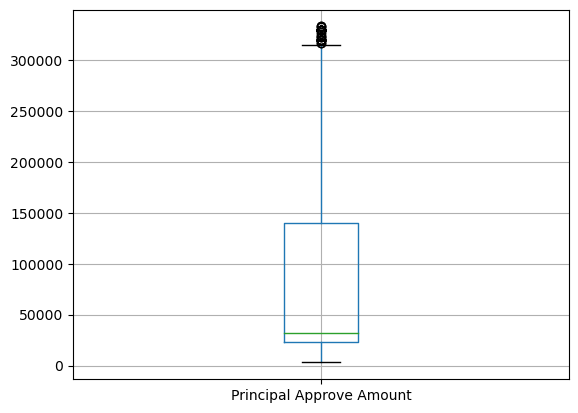

In [94]:
df = df[(df['Principal Approve Amount'] > lower_limit) & (df['Principal Approve Amount'] < upper_limit)]
df.boxplot(column=['Principal Approve Amount'])

In [95]:
cal_Q1 = df["Principal Amount"].quantile(0.25)
cal_Q3 = df["Principal Amount"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

116616.025

In [96]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -152423.96749999997 upper: 314040.13249999995


<AxesSubplot:>

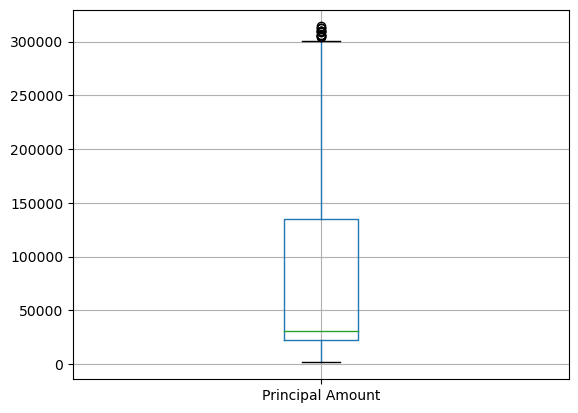

In [97]:
df = df[(df['Principal Amount'] > lower_limit) & (df['Principal Amount'] < upper_limit)]
df.boxplot(column=['Principal Amount'])

<AxesSubplot:>

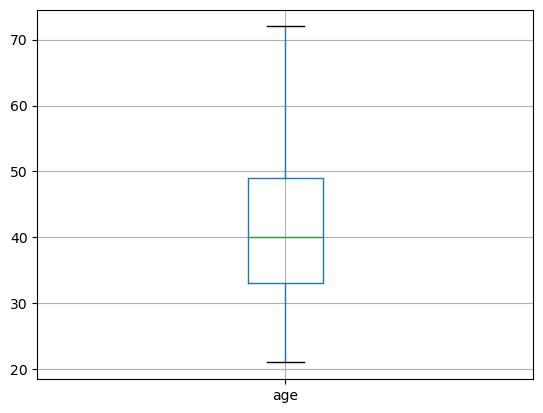

In [98]:
df = df[(df['age'] > lower_limit) & (df['age'] < upper_limit)]
df.boxplot(column=['age'])

<AxesSubplot:>

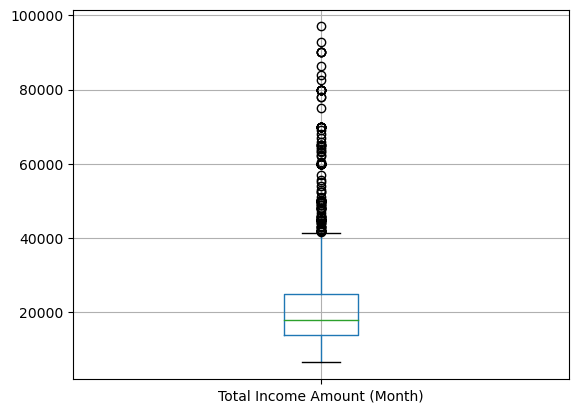

In [99]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [100]:
df['Total Income Amount (Month)'].max()

97000.0

In [101]:
df['Total Income Amount (Month)'].min()

6500.0

In [102]:
cal_Q1 = df["Total Income Amount (Month)"].quantile(0.25)
cal_Q3 = df["Total Income Amount (Month)"].quantile(0.75)
cal_IQR = cal_Q3 - cal_Q1
cal_IQR

11000.0

In [103]:
lower_limit = cal_Q1 - 1.5 * cal_IQR
upper_limit = cal_Q3 + 1.5 * cal_IQR
print('lower:', lower_limit, 'upper:', upper_limit)

lower: -2500.0 upper: 41500.0


<AxesSubplot:>

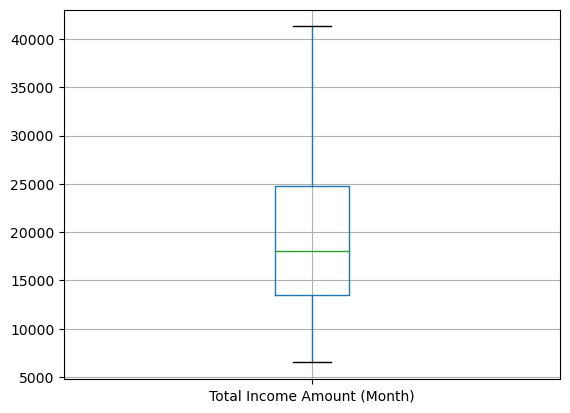

In [104]:
df = df[(df['Total Income Amount (Month)'] > lower_limit) & (df['Total Income Amount (Month)'] < upper_limit)]
df.boxplot(column=['Total Income Amount (Month)'])

In [105]:
df['Total Income Amount (Month)'].min()

6500.0

In [106]:
df['Total Income Amount (Month)'].max()

41308.0

In [107]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       3410.00                      3410.00   
mean                          36.55                     19168.37   
std                           16.23                      7843.54   
min                           12.00                      6500.00   
25%                           24.00                     13500.00   
50%                           36.00                     18000.00   
75%                           60.00                     24805.00   
max                           60.00                     41308.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               3410.00            3410.00  3410.00      3410.00  
mean                2012.75          120642.87    41.23        10.25  
std                    5.32          122898.83    10.71         5.32  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           35000.00    33.00         6.00  
50%                 2013.00           44000.00    40.00        10.00  
75%                 2017.00          209375.00    49.00        14.00  
max                 2022.00          831000.00    72.00        33.00

<AxesSubplot:>

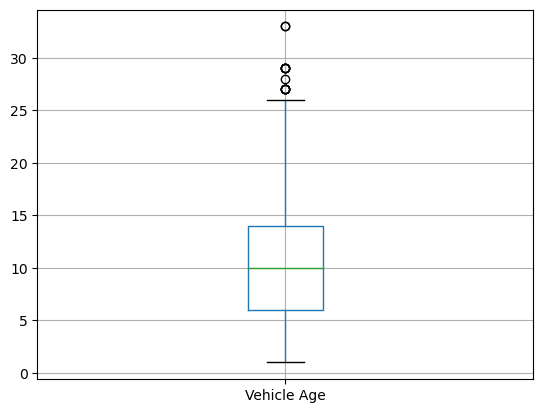

In [108]:
df = df[(df['Vehicle Age'] > lower_limit) & (df['Vehicle Age'] < upper_limit)]
df.boxplot(column=['Vehicle Age'])

In [109]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       3410.00                      3410.00   
mean                          36.55                     19168.37   
std                           16.23                      7843.54   
min                           12.00                      6500.00   
25%                           24.00                     13500.00   
50%                           36.00                     18000.00   
75%                           60.00                     24805.00   
max                           60.00                     41308.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               3410.00            3410.00  3410.00      3410.00  
mean                2012.75          120642.87    41.23        10.25  
std                    5.32          122898.83    10.71         5.32  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           35000.00    33.00         6.00  
50%                 2013.00           44000.00    40.00        10.00  
75%                 2017.00          209375.00    49.00        14.00  
max                 2022.00          831000.00    72.00        33.00

### Data Visualize

#### Categorical

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

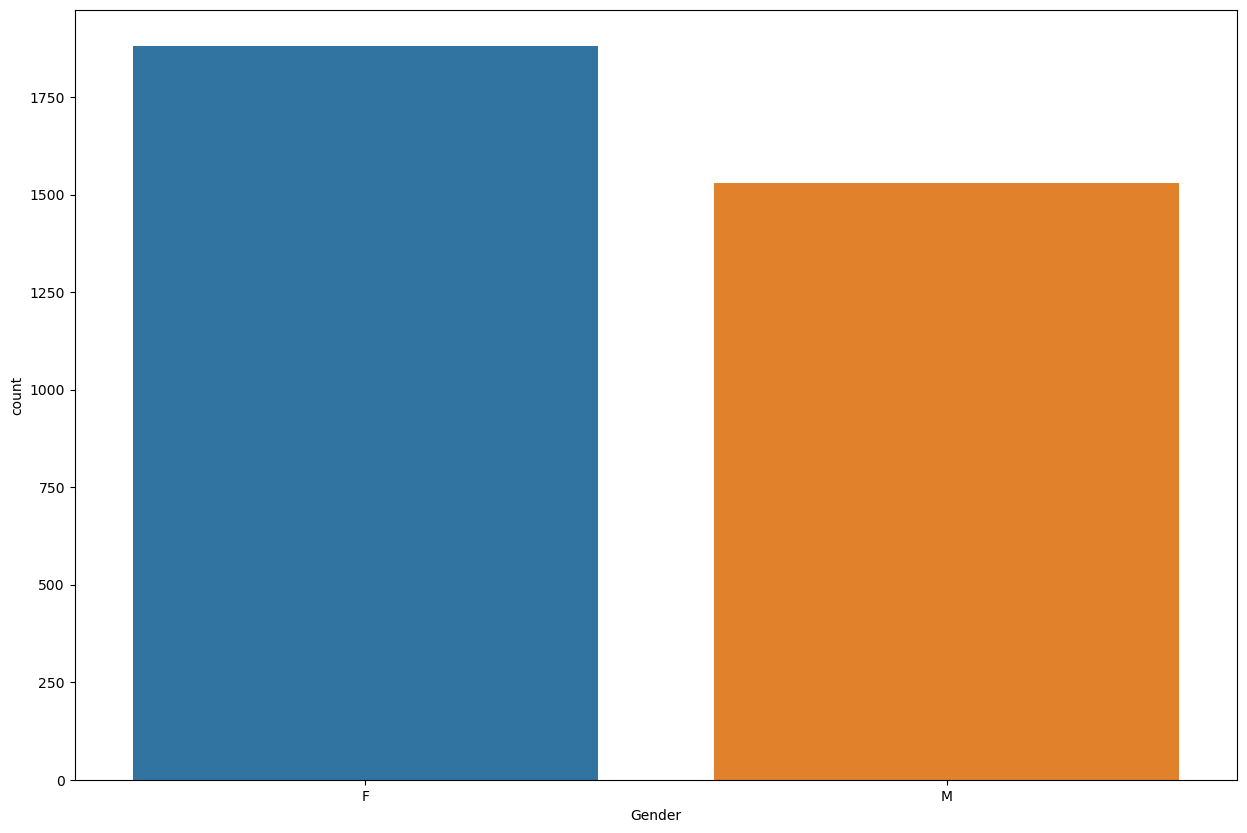

In [110]:
plt.figure(figsize=(15,10))
sns.countplot(df['Gender'])

In [111]:
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=13

<AxesSubplot:xlabel='Occupation Description', ylabel='count'>

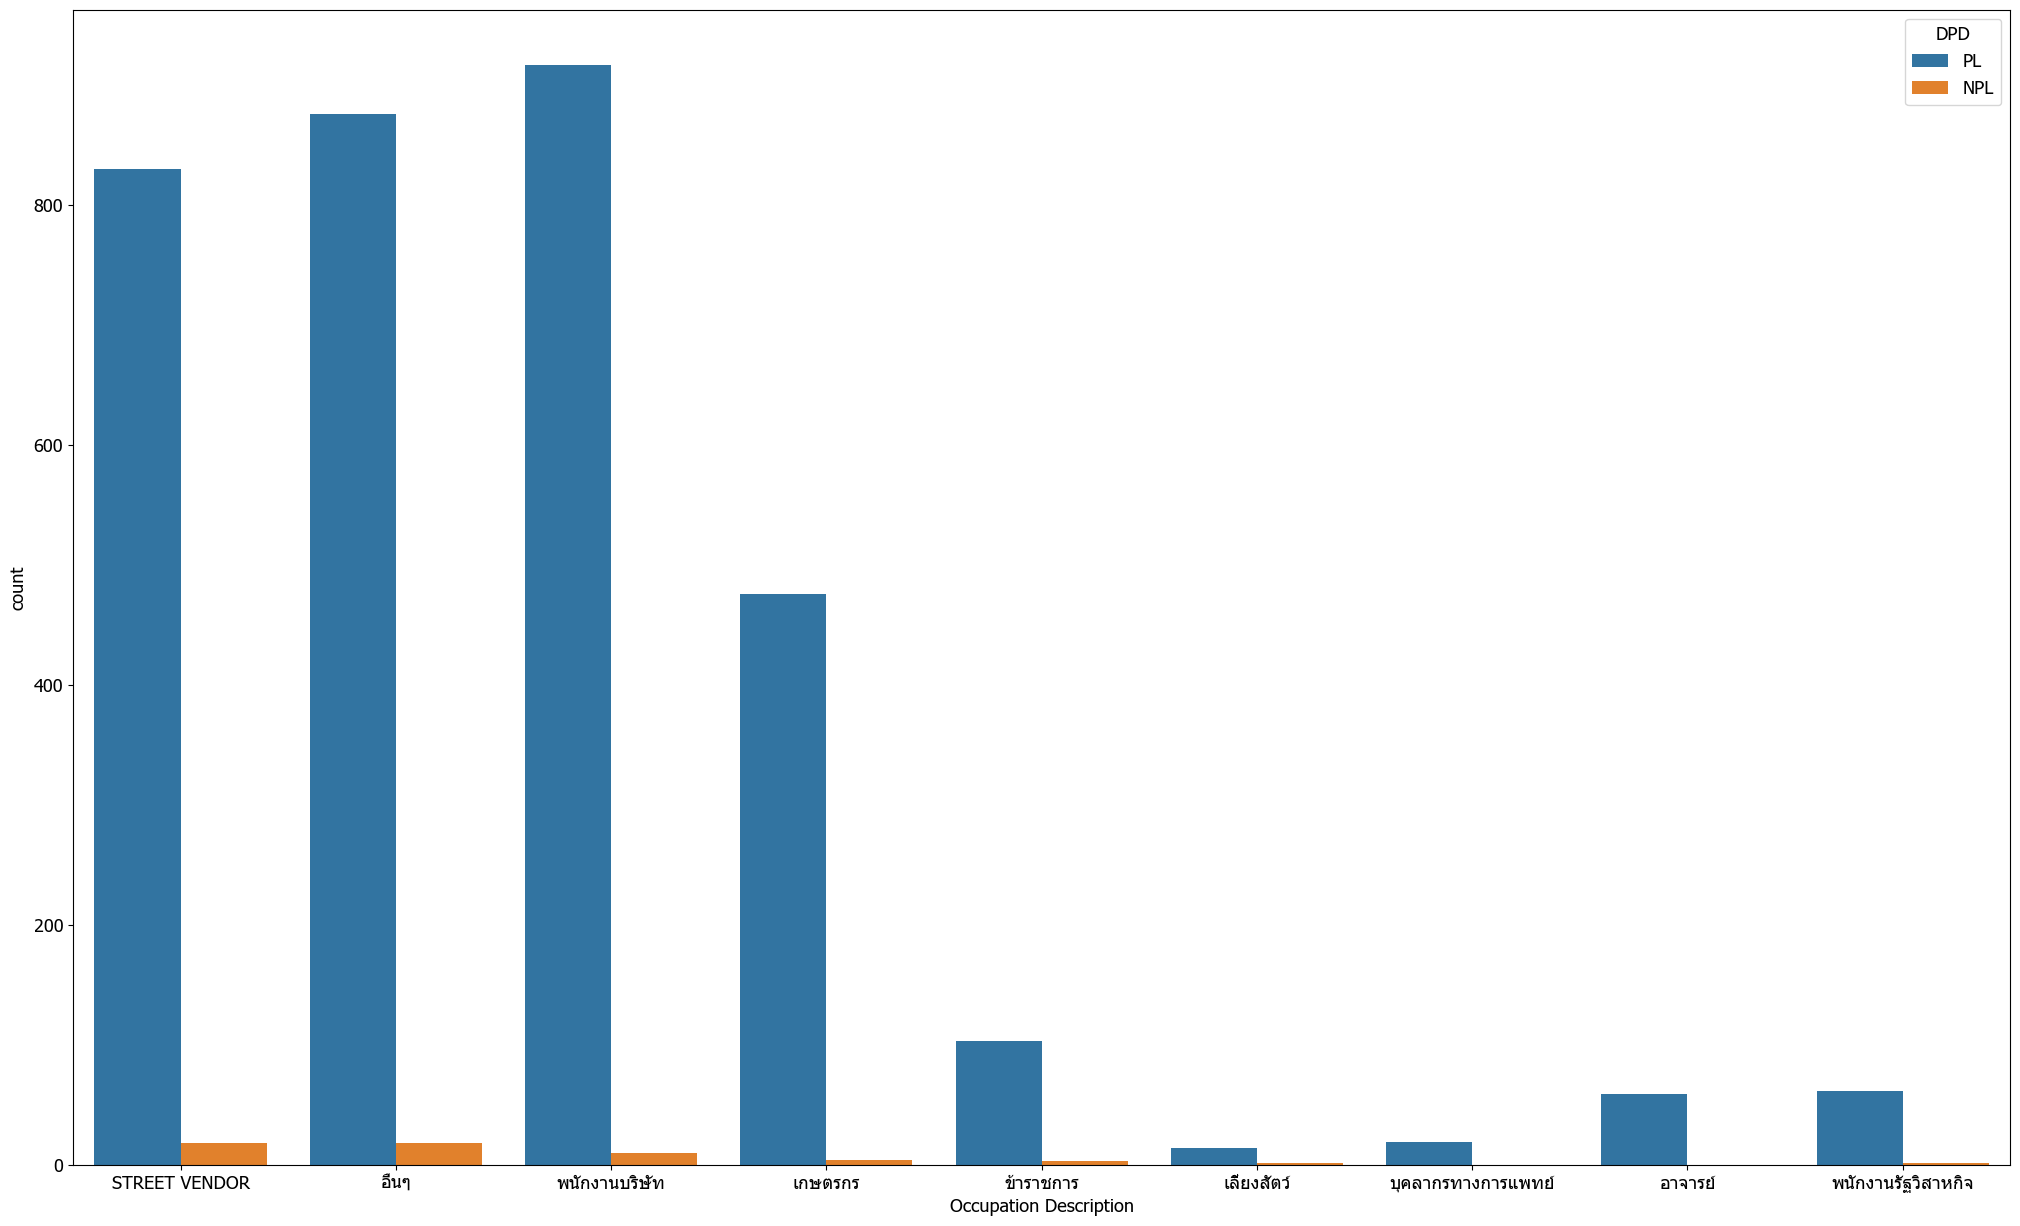

In [112]:
plt.figure(figsize=(25,15))
sns.countplot(data=df, x="Occupation Description", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Age', ylabel='count'>

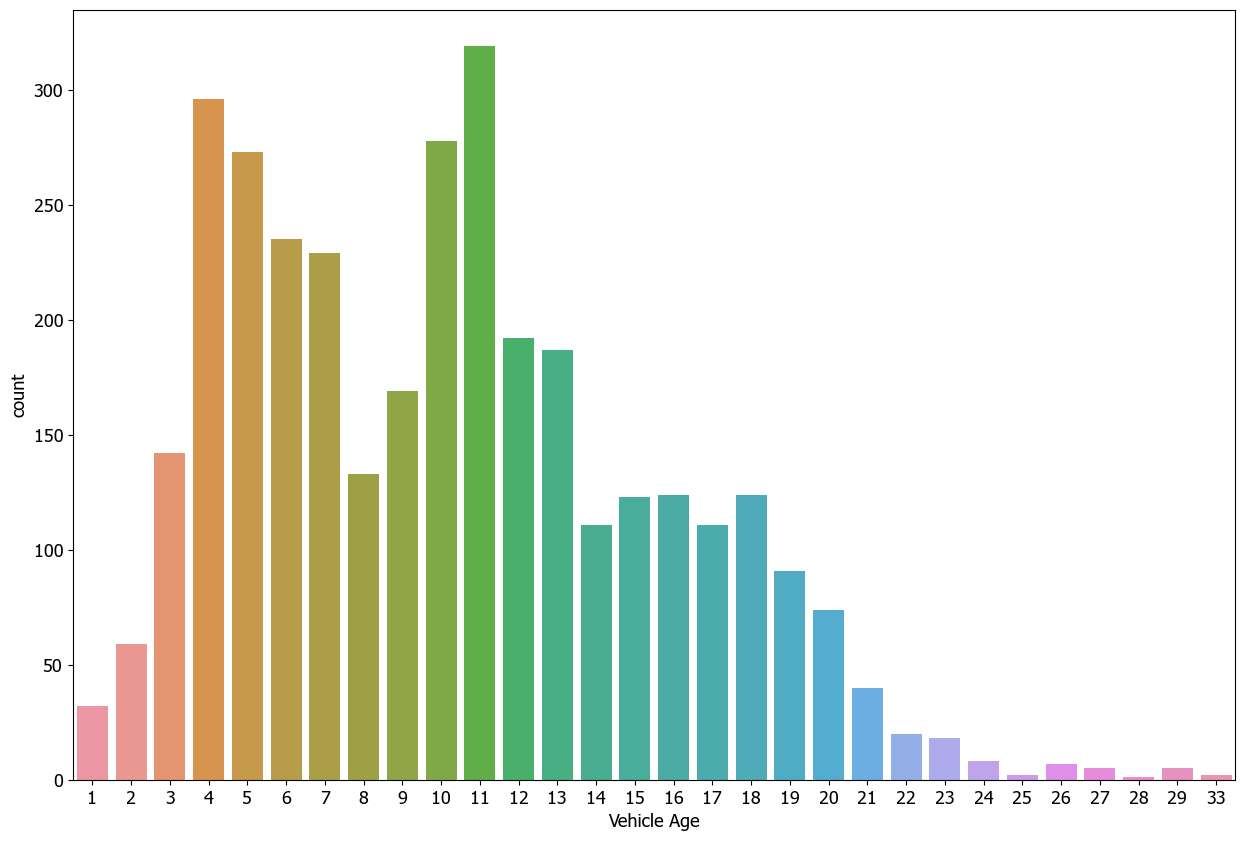

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Age'])

<AxesSubplot:xlabel='Collateral Type Code', ylabel='count'>

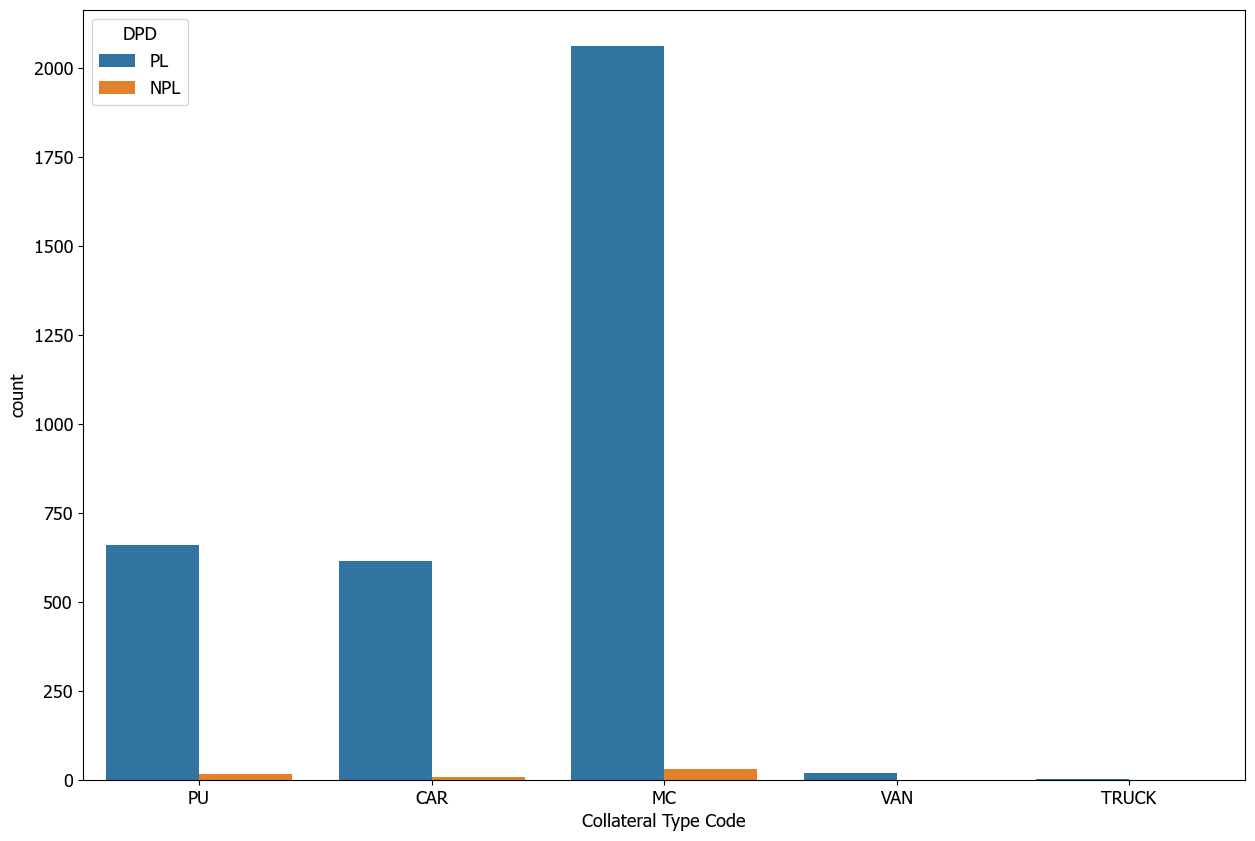

In [114]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x="Collateral Type Code", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle Brand', ylabel='count'>

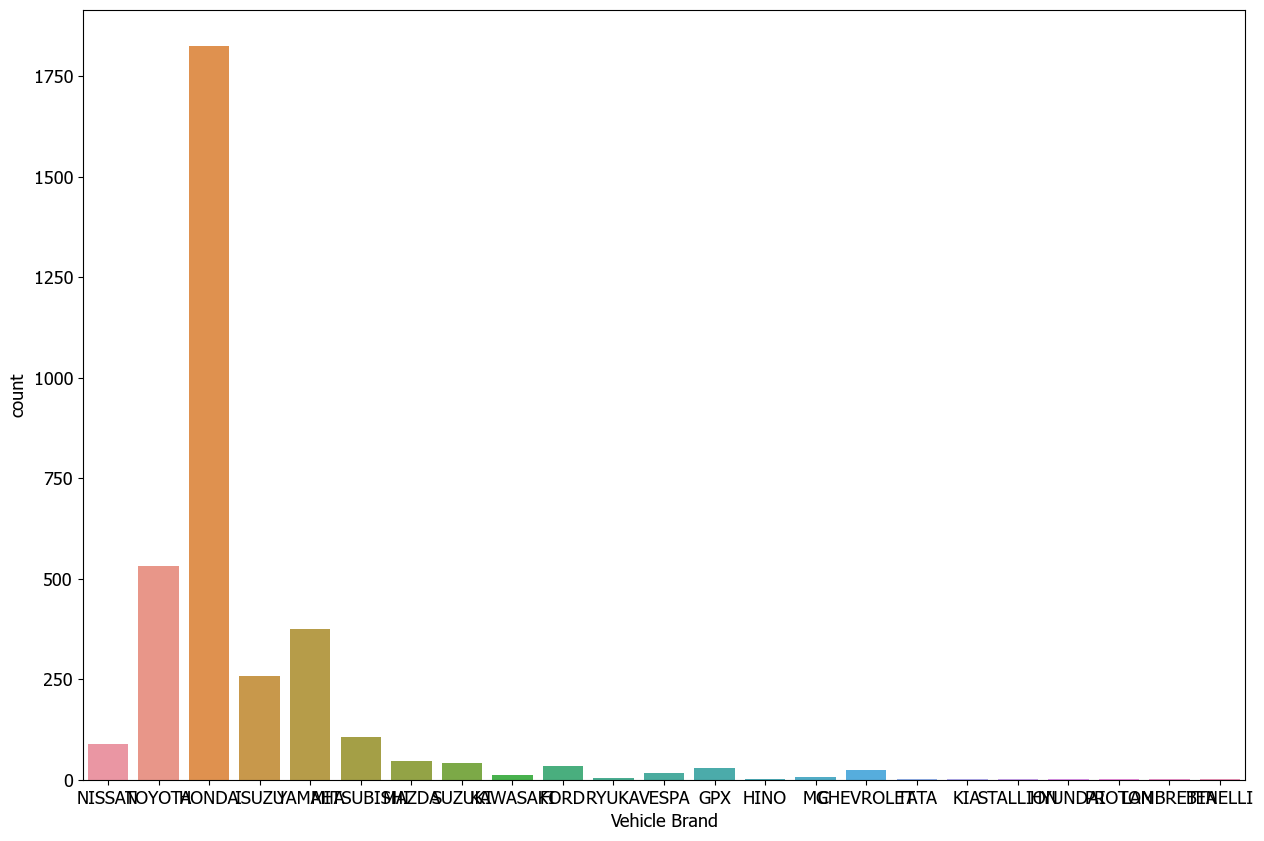

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(df['Vehicle Brand'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='System CAR Code (Daily)', ylabel='count'>

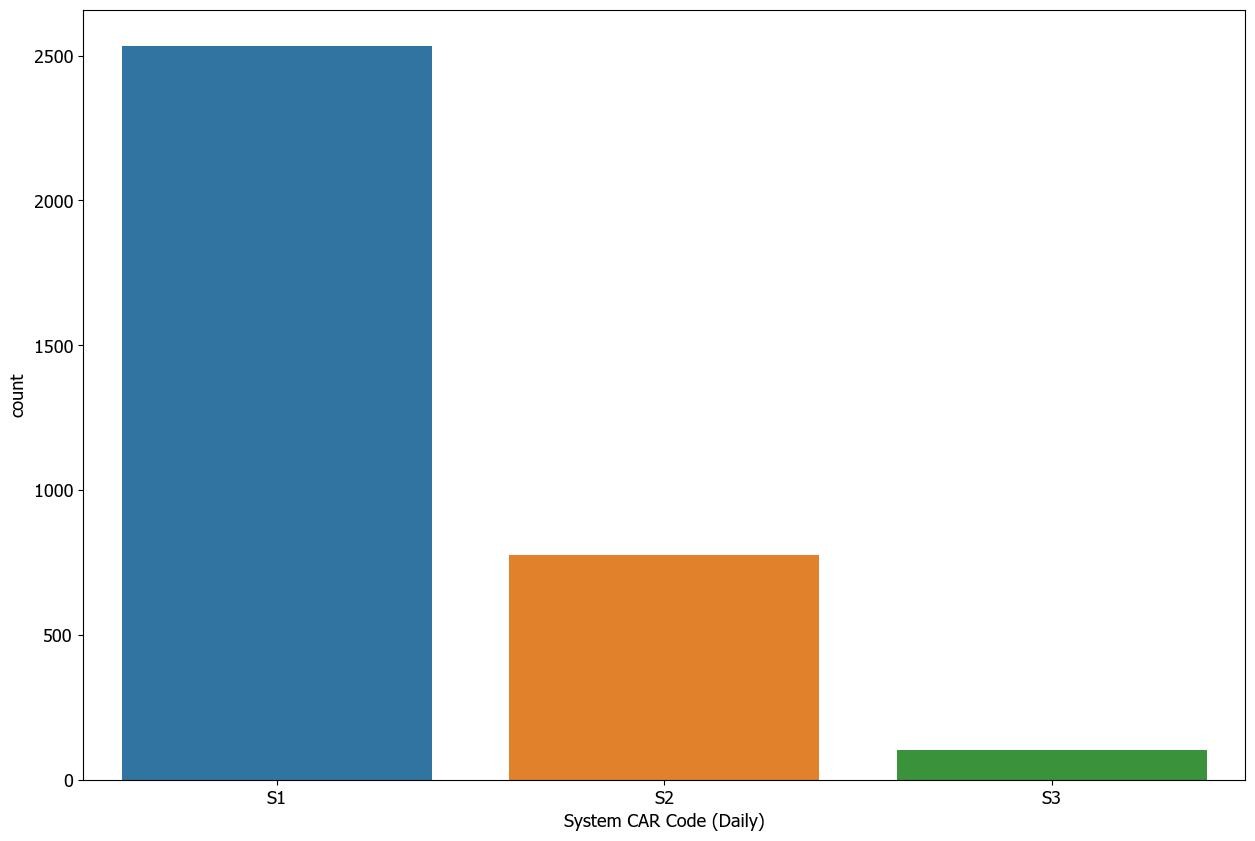

In [116]:
plt.figure(figsize=(15,10))
sns.countplot(df['System CAR Code (Daily)'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

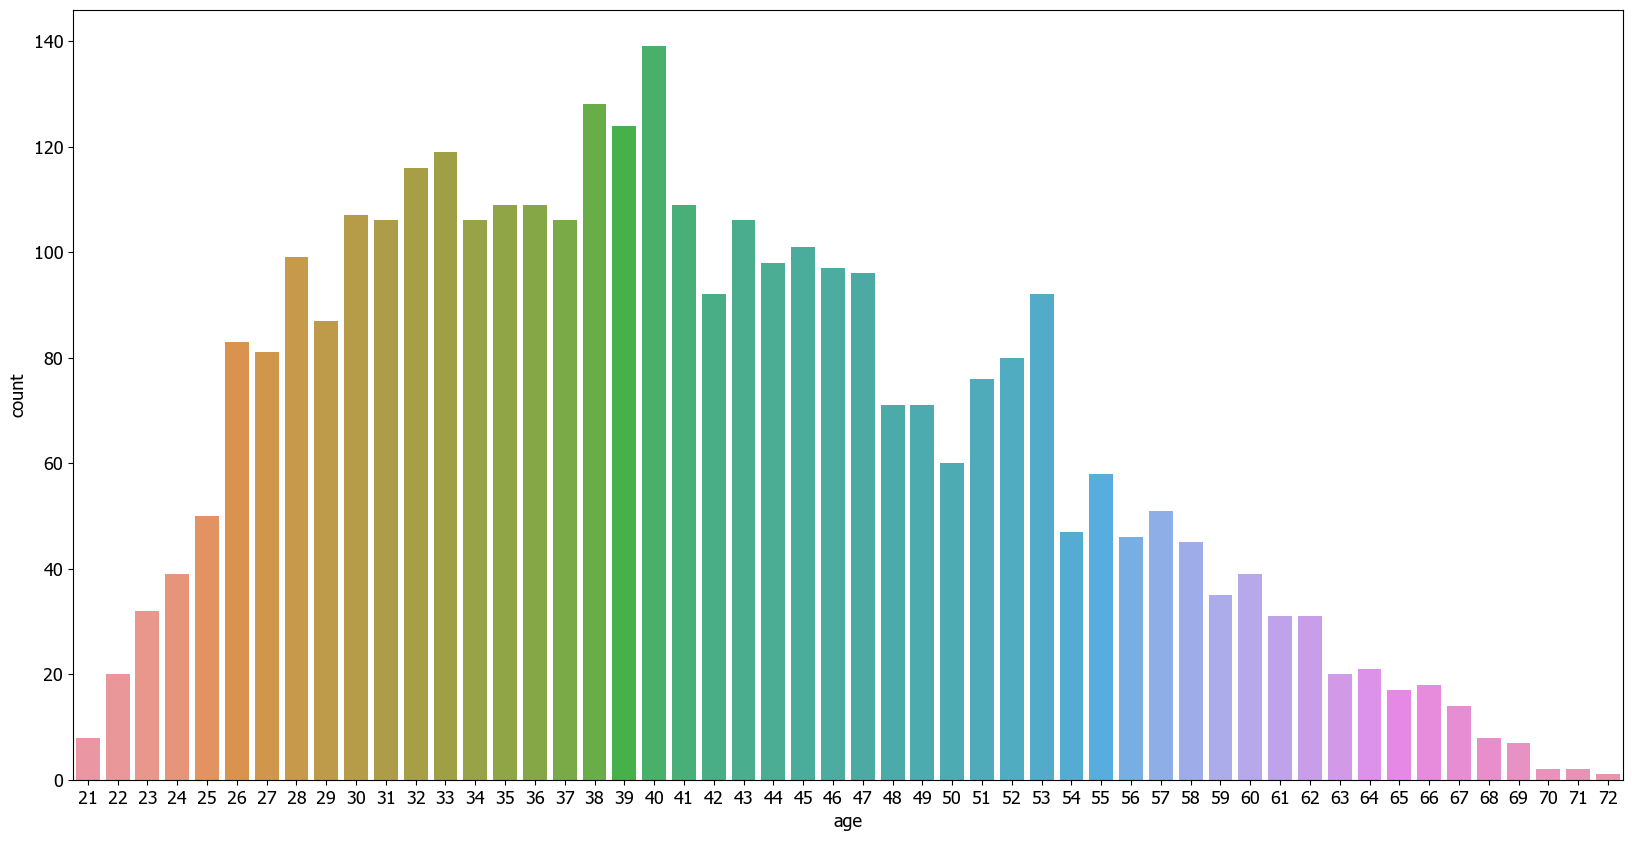

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Application Status', ylabel='count'>

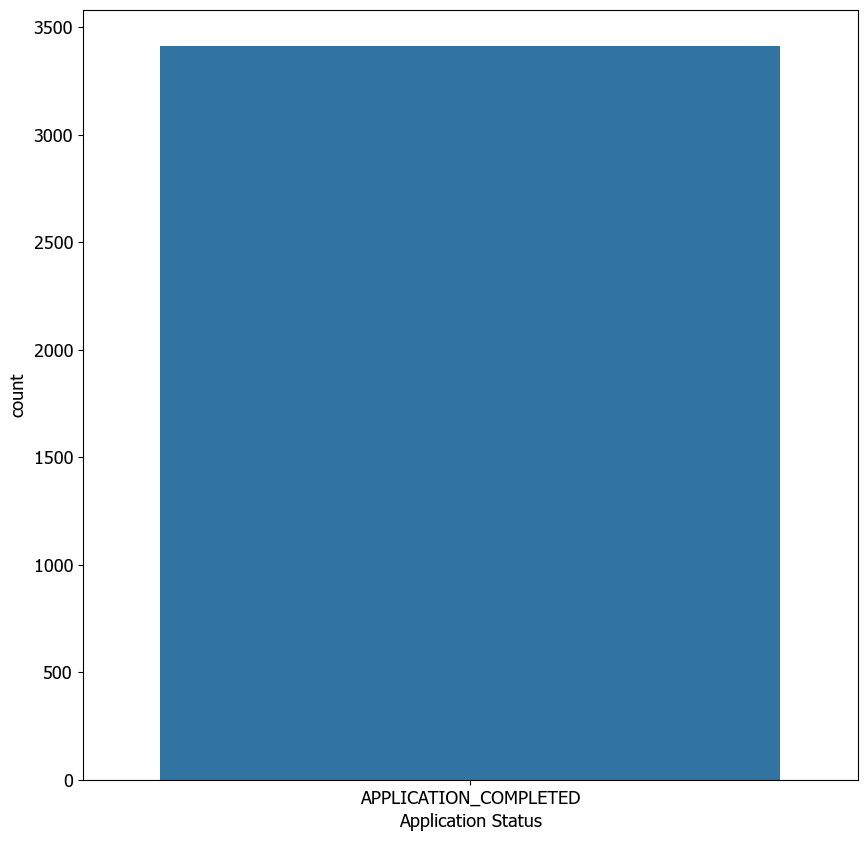

In [118]:
plt.figure(figsize=(10,10))
sns.countplot(df['Application Status'])

#### numerical

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

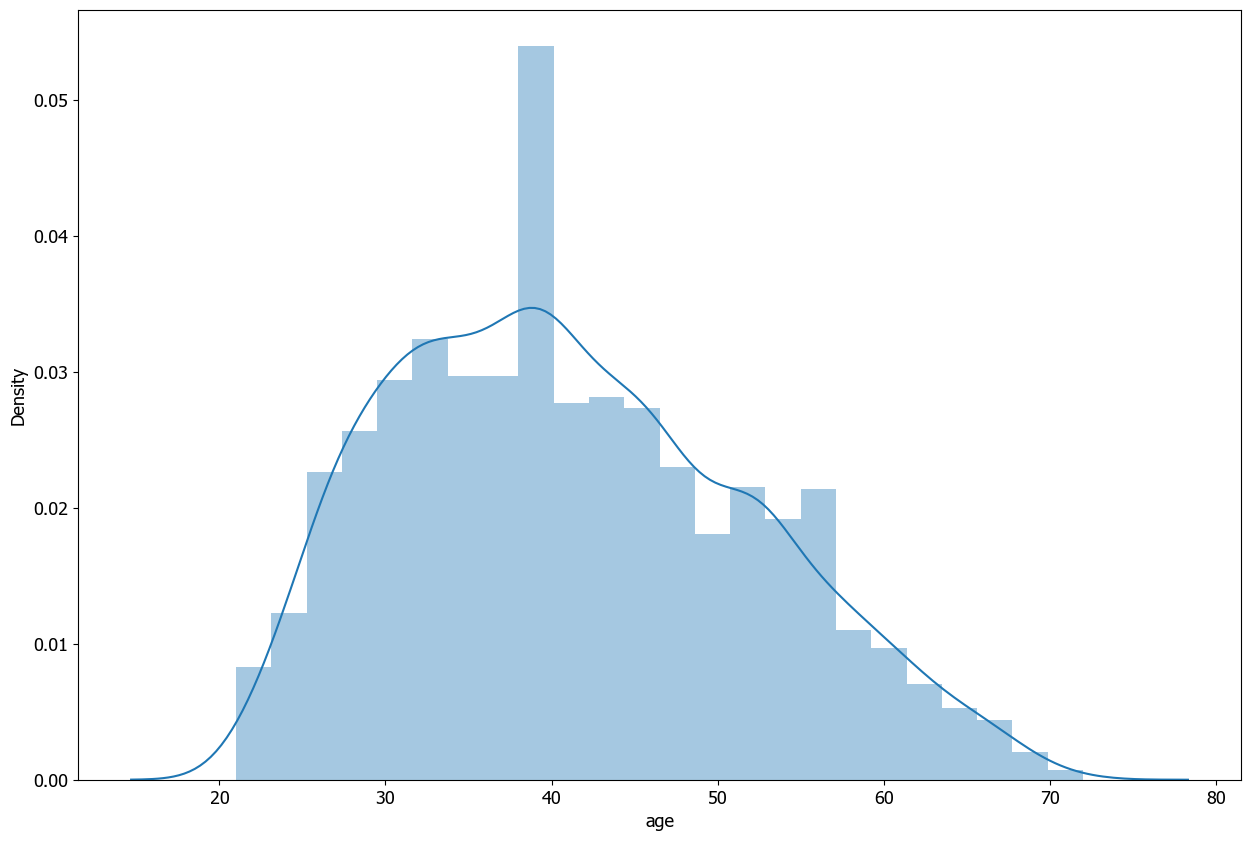

In [119]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Approve Amount', ylabel='Density'>

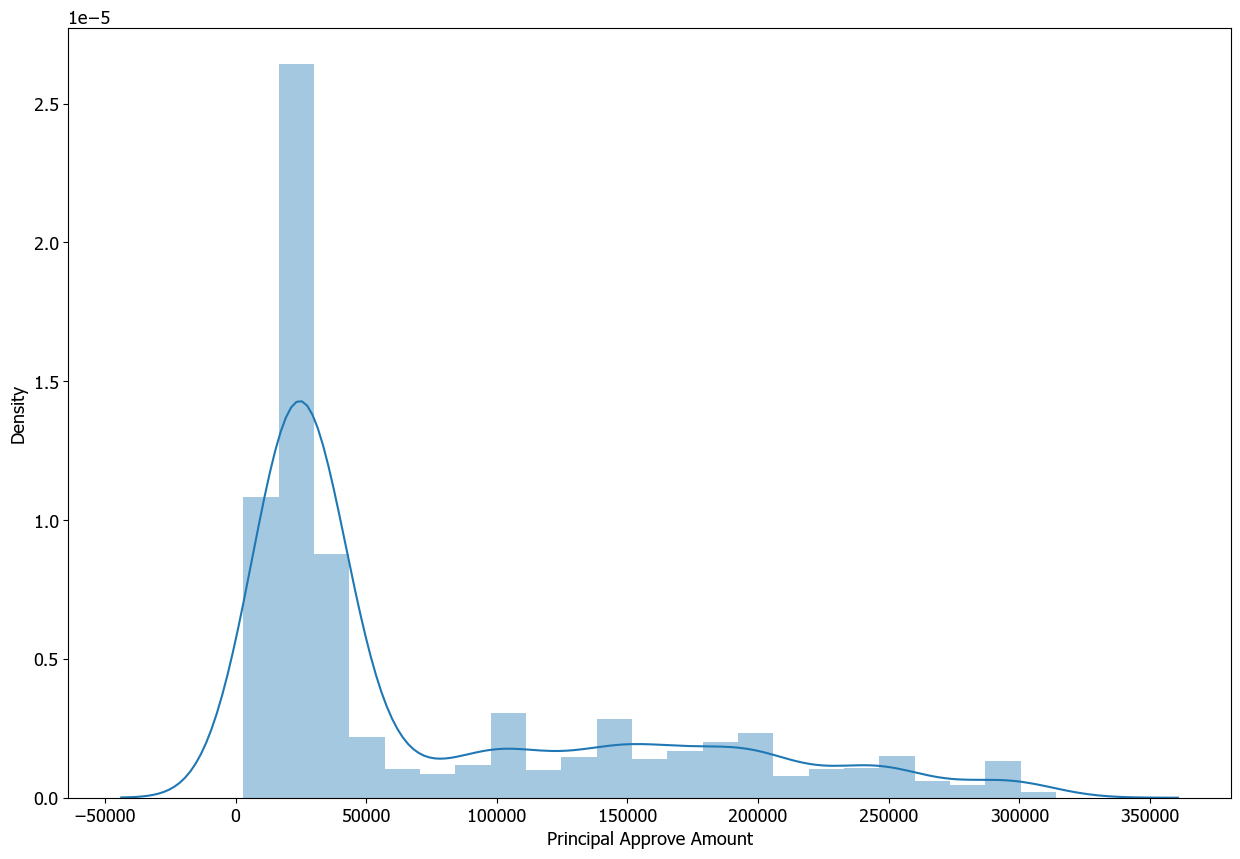

In [120]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Approve Amount'])

In [121]:
df['Principal Approve Amount'].min()

3000.0

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Repayment Tenor Month Number', ylabel='Density'>

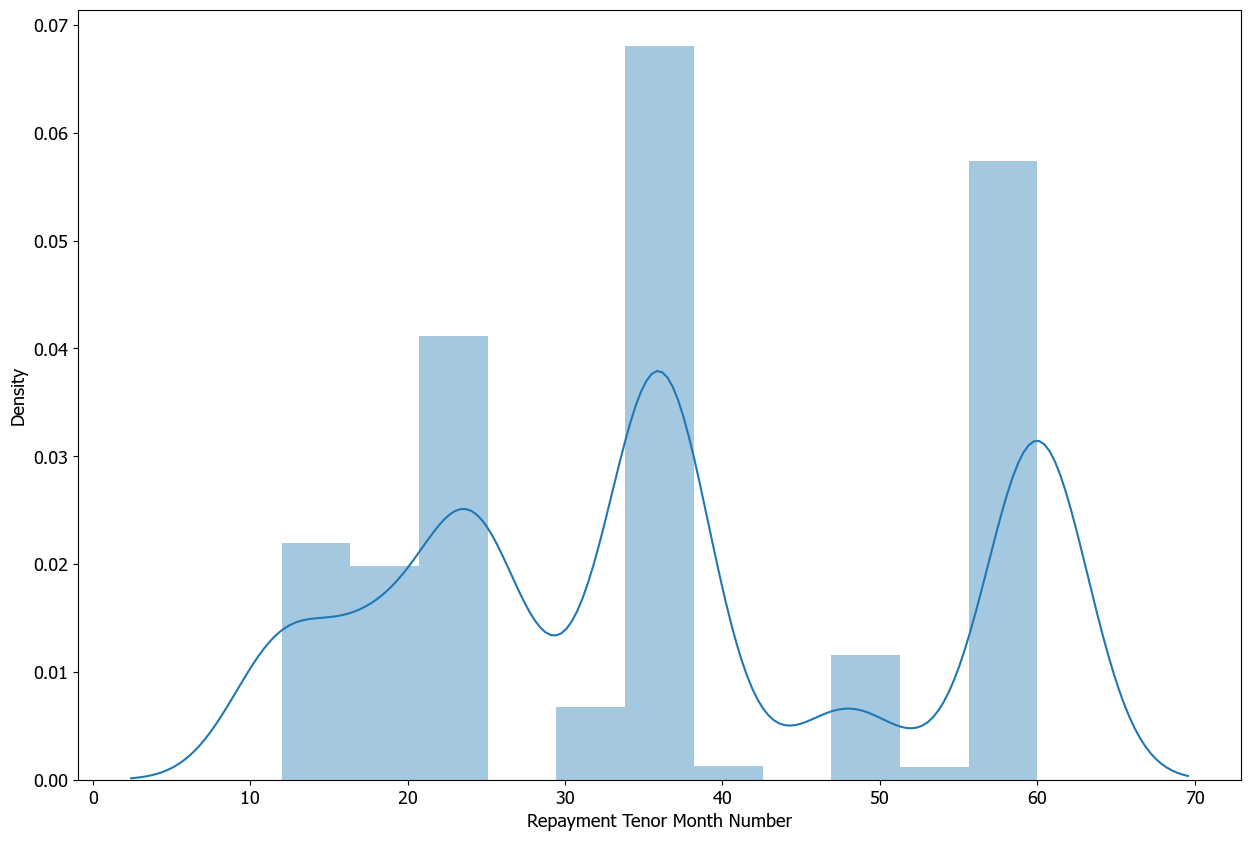

In [122]:
plt.figure(figsize=(15,10))
sns.distplot(df['Repayment Tenor Month Number'])

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Income Amount (Month)', ylabel='Density'>

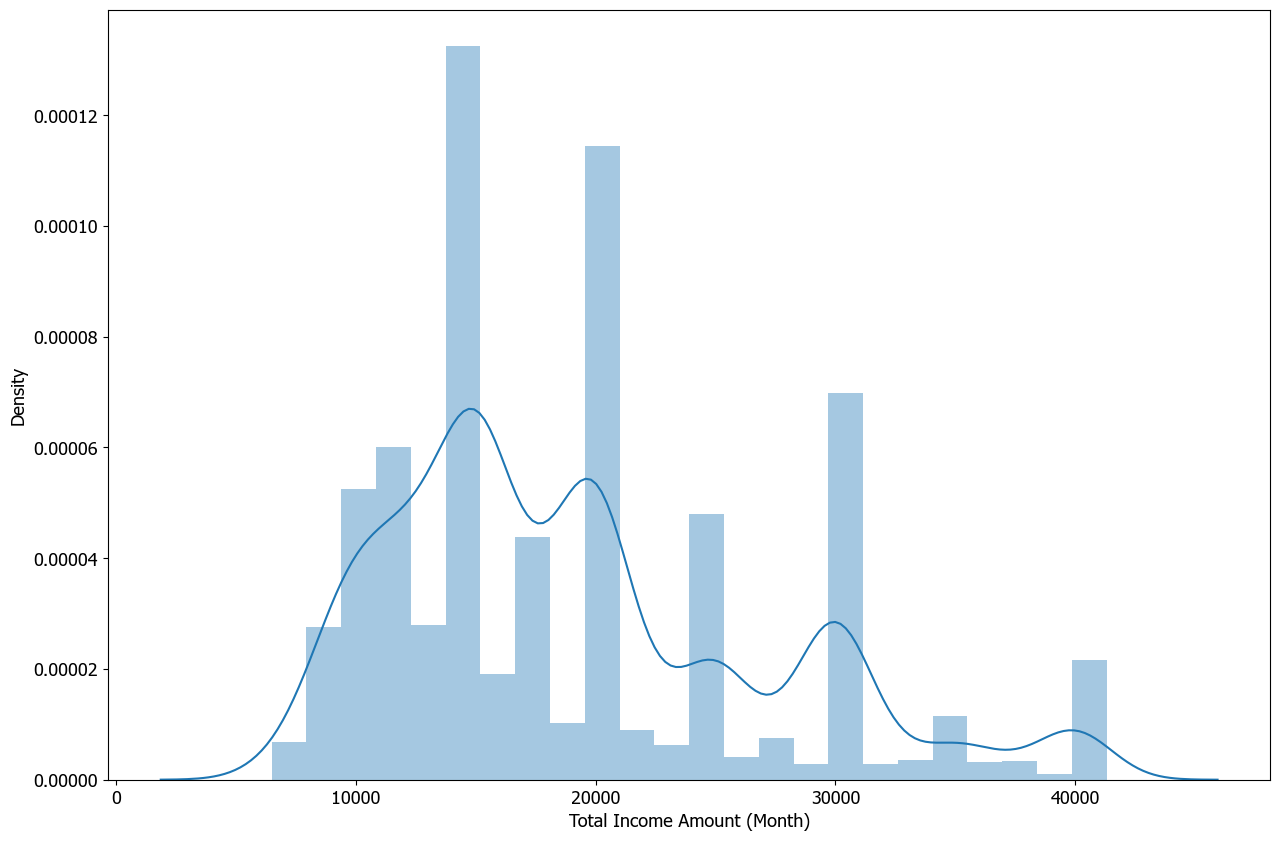

In [123]:
plt.figure(figsize=(15,10))
sns.distplot(df['Total Income Amount (Month)'])

In [124]:
train_df = df ## Dropping Application Number
categorical_columns = ['Gender','Occupation Description','Vehicle Age','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','age','Principal Approve Amount']

print(categorical_columns)
numerical_columns = ['age','Principal Amount', 'Repayment Tenor Month Number','Total Income Amount (Month)']
print(numerical_columns)

['Gender', 'Occupation Description', 'Vehicle Age', 'Collateral Type Code', 'Vehicle Brand', 'System CAR Code (Daily)', 'age', 'Principal Approve Amount']
['age', 'Principal Amount', 'Repayment Tenor Month Number', 'Total Income Amount (Month)']


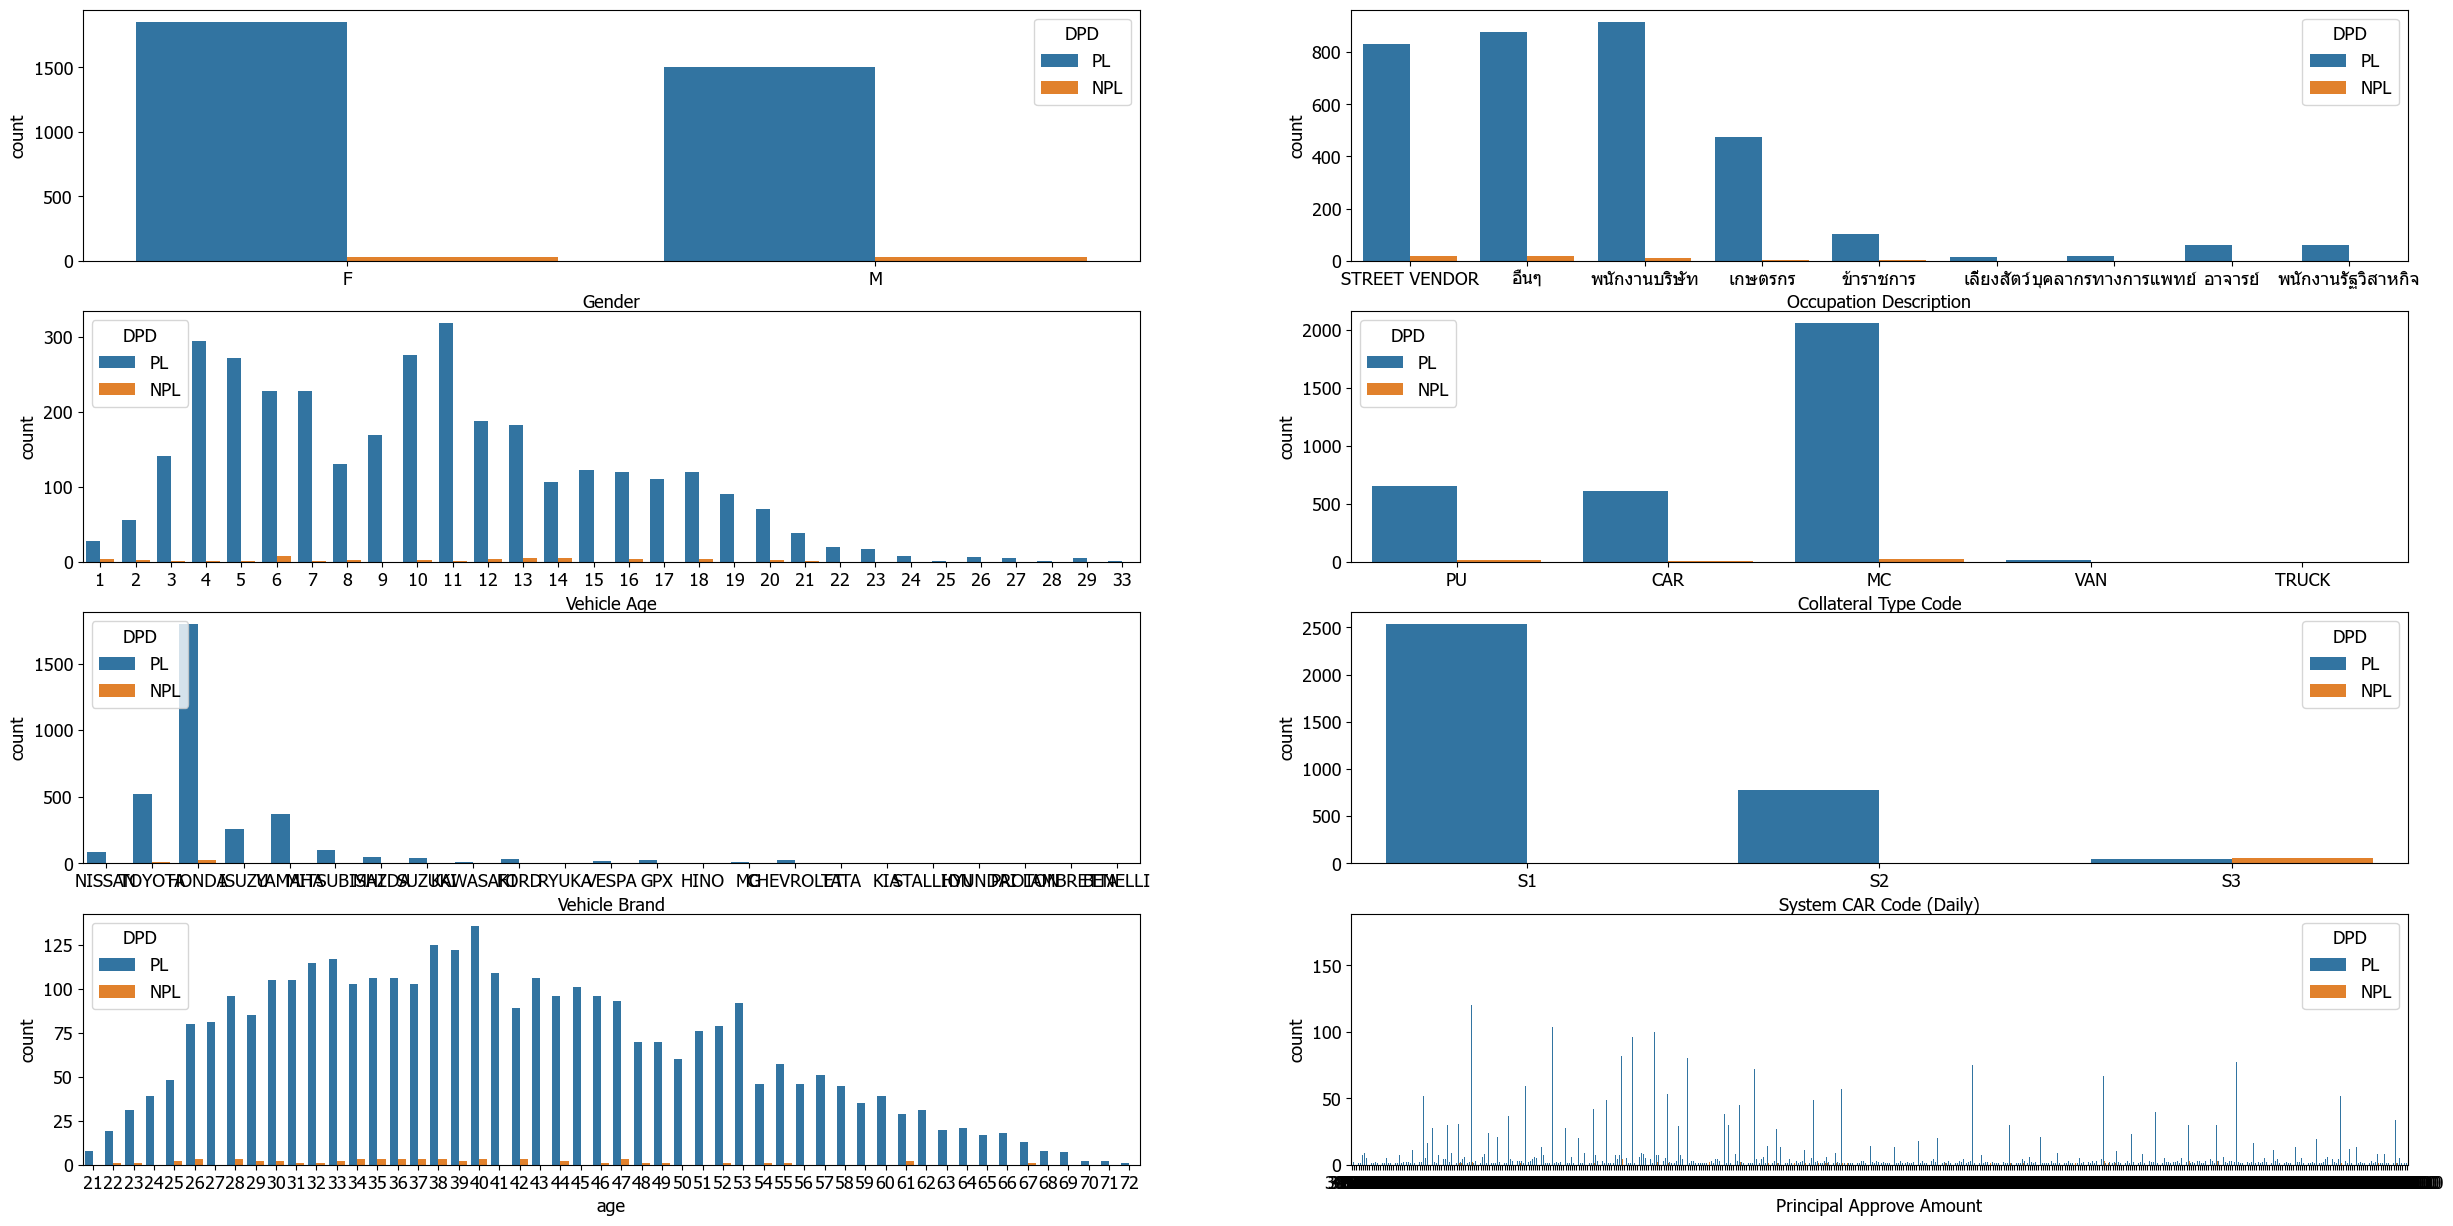

In [125]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(30,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='DPD',ax=axes[row,col])


#plt.subplots_adjust(hspace=1)

In [126]:
# fig,axes = plt.subplots(1,3,figsize=(17,5))
# for idx,cat_col in enumerate(numerical_columns):
#     sns.boxplot(y=cat_col,data=train_df,x='DPD',ax=axes[idx])

# print(train_df[numerical_columns].describe())
# plt.subplots_adjust(hspace=1)

In [127]:
cols = ['Evaluation Amount','Principal Approve Amount','Total Income Amount (Month)','Repayment Tenor Month Number','age','Vehicle Age']

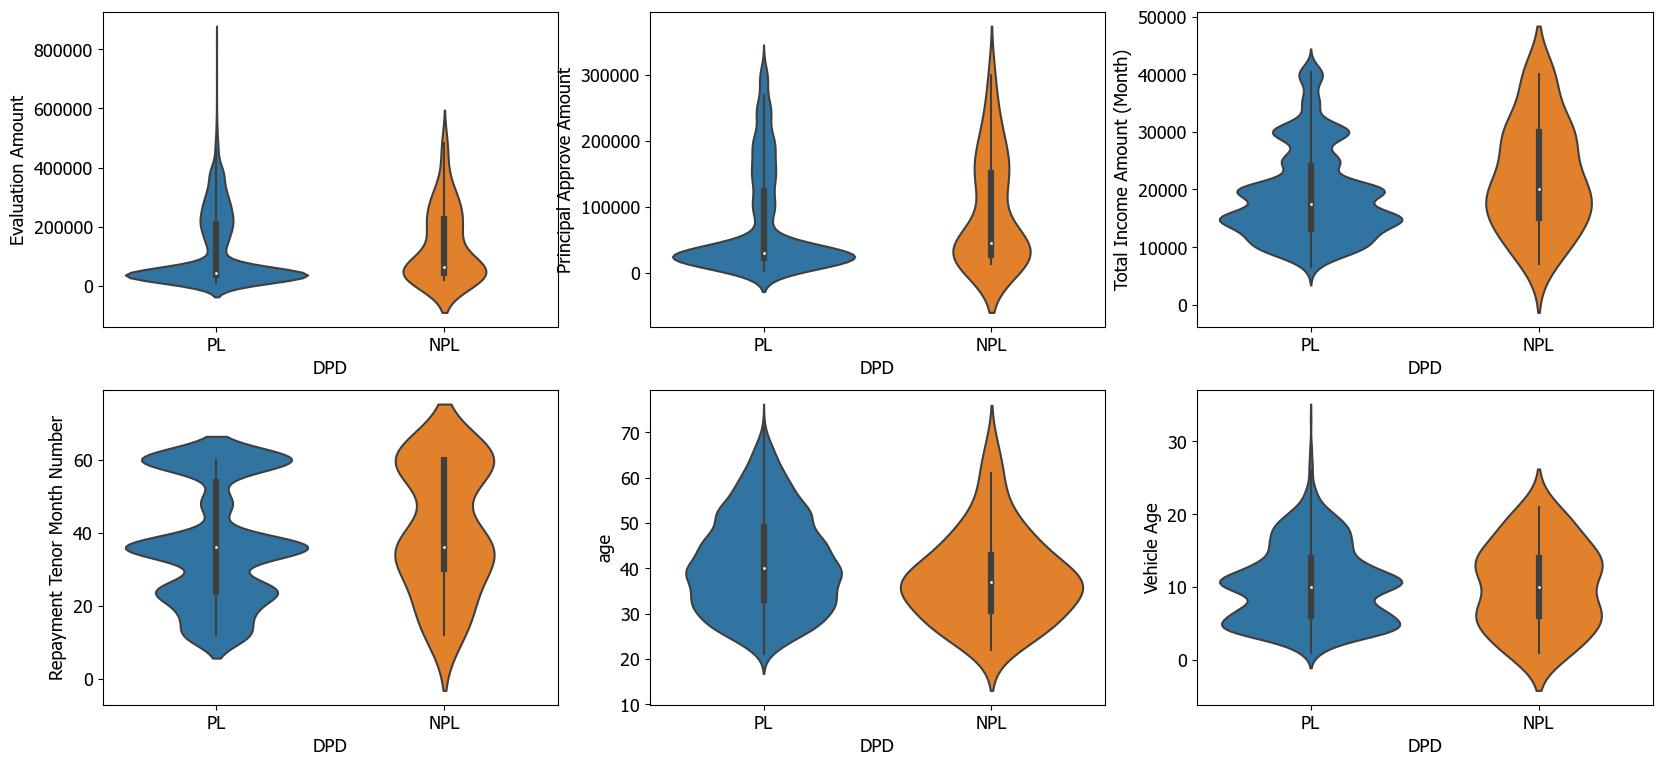

In [128]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,9))
ax = ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='DPD', y=col, data=df, ax=ax[i])

### correlation matrix

In [129]:
corr = df.corr()
corr

Principal Approve Amount  Principal Amount  \
Principal Approve Amount                      1.000000          0.999148   
Principal Amount                              0.999148          1.000000   
Repayment Tenor Month Number                  0.769579          0.773993   
Total Income Amount (Month)                   0.362215          0.360797   
Vehicle Release Year                         -0.264901         -0.264737   
Evaluation Amount                             0.907540          0.904241   
age                                           0.080608          0.079327   
Vehicle Age                                   0.264901          0.264737   

                              Repayment Tenor Month Number  \
Principal Approve Amount                          0.769579   
Principal Amount                                  0.773993   
Repayment Tenor Month Number                      1.000000   
Total Income Amount (Month)                       0.247915   
Vehicle Release Year                             -0.318423   
Evaluation Amount                                 0.686341   
age                                               0.041962   
Vehicle Age                                       0.318423   

                              Total Income Amount (Month)  \
Principal Approve Amount                         0.362215   
Principal Amount                                 0.360797   
Repayment Tenor Month Number                     0.247915   
Total Income Amount (Month)                      1.000000   
Vehicle Release Year                            -0.148487   
Evaluation Amount                                0.375999   
age                                              0.115871   
Vehicle Age                                      0.148487   

                              Vehicle Release Year  Evaluation Amount  \
Principal Approve Amount                 -0.264901           0.907540   
Principal Amount                         -0.264737           0.904241   
Repayment Tenor Month Number             -0.318423           0.686341   
Total Income Amount (Month)              -0.148487           0.375999   
Vehicle Release Year                      1.000000          -0.280837   
Evaluation Amount                        -0.280837           1.000000   
age                                      -0.164787           0.107953   
Vehicle Age                              -1.000000           0.280837   

                                   age  Vehicle Age  
Principal Approve Amount      0.080608     0.264901  
Principal Amount              0.079327     0.264737  
Repayment Tenor Month Number  0.041962     0.318423  
Total Income Amount (Month)   0.115871     0.148487  
Vehicle Release Year         -0.164787    -1.000000  
Evaluation Amount             0.107953     0.280837  
age                           1.000000     0.164787  
Vehicle Age                   0.164787     1.000000

In [130]:
df.describe().round(2)

Principal Approve Amount  Principal Amount  \
count                   3410.00           3410.00   
mean                   75629.66          74669.25   
std                    79271.47          79109.90   
min                     3000.00           1583.59   
25%                    22525.00          21643.71   
50%                    30000.00          29975.93   
75%                   125750.00         124864.20   
max                   314000.00         314000.00   

       Repayment Tenor Month Number  Total Income Amount (Month)  \
count                       3410.00                      3410.00   
mean                          36.55                     19168.37   
std                           16.23                      7843.54   
min                           12.00                      6500.00   
25%                           24.00                     13500.00   
50%                           36.00                     18000.00   
75%                           60.00                     24805.00   
max                           60.00                     41308.00   

       Vehicle Release Year  Evaluation Amount      age  Vehicle Age  
count               3410.00            3410.00  3410.00      3410.00  
mean                2012.75          120642.87    41.23        10.25  
std                    5.32          122898.83    10.71         5.32  
min                 1990.00           10000.00    21.00         1.00  
25%                 2009.00           35000.00    33.00         6.00  
50%                 2013.00           44000.00    40.00        10.00  
75%                 2017.00          209375.00    49.00        14.00  
max                 2022.00          831000.00    72.00        33.00

In [131]:
df.shape

(3410, 20)

In [132]:
category = ['DPD']

for i in category:
    print(f'{i}:{df[i].unique()}\n')

DPD:['PL', 'NPL']
Categories (2, object): ['PL' < 'NPL']



In [133]:
df['DPD'].value_counts()

PL     3355
NPL      55
Name: DPD, dtype: int64

# Modeling

### Drop Columns ที่ไม่ใช้

In [134]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [135]:
df2 = df.copy()

In [136]:
cols = ['DOB','Application Status']
df2 = df2.drop(columns=cols, axis=1)

In [137]:
df2.head(2)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   

  Gender Occupation Description  Total Income Amount (Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   

  Collateral Type Code Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   

  System CAR Code Date Final CAR Code Previous Month DPD  age  Vehicle Age  
0           2022-11-14                            S1  PL   44           11  
1           2022-09-06                            S1  PL   53           21

In [138]:
df2['per_LTV'] = df2['Principal Approve Amount']/df2['Evaluation Amount']*100
df2.head(5)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

  Gender Occupation Description  Total Income Amount (Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   
2      F          พนักงานบริษัท                      15000.0   
3      F                เกษตรกร                      35000.0   
4      M          พนักงานบริษัท                      40000.0   

  Collateral Type Code Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   
2                   MC         HONDA       CLICK 150I                  2019   
3                   MC         HONDA          PCX 150                  2020   
4                   PU         ISUZU            D-MAX                  2013   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   
2                BH              48500                      S1   
3                ED              76500                      S1   
4                BU             414500                      S1   

  System CAR Code Date Final CAR Code Previous Month DPD  age  Vehicle Age  \
0           2022-11-14                            S1  PL   44           11   
1           2022-09-06                            S1  PL   53           21   
2           2022-12-30                            S2  PL   32            4   
3           2022-11-12                            S1  PL   37            3   
4           2022-12-29                            S1  PL   57           10   

     per_LTV  
0  70.194004  
1  54.054054  
2  74.226804  
3  39.215686  
4  48.250905

In [139]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       3410 non-null   float64       
 1   Principal Amount               3410 non-null   float64       
 2   Repayment Tenor Month Number   3410 non-null   int32         
 3   Gender                         3410 non-null   object        
 4   Occupation Description         3410 non-null   object        
 5   Total Income Amount (Month)    3410 non-null   float64       
 6   Collateral Type Code           3410 non-null   object        
 7   Vehicle Brand                  3410 non-null   object        
 8   Vehicle Model                  3410 non-null   object        
 9   Vehicle Release Year           3410 non-null   int64         
 10  Vehicle Sub Model              3410 non-null   object        
 11  Evaluation Amount

In [140]:
from pandas.api.types import CategoricalDtype
#bins = [0,30,60]
LTV = ['30%','30-50%','50-65%','65-75%','75%']
df2['per_LTV_cate'] = pd.cut(df2.per_LTV,
                                    bins = [0,30,50,60,75,100],
                                    labels=LTV, 
                                    right=True).astype(CategoricalDtype(LTV, ordered=True))
df2.sort_values(by='per_LTV')

Principal Approve Amount  Principal Amount  \
2254                   12000.0          11139.10   
3375                   15000.0          14480.87   
3820                   12000.0          12000.00   
3075                   13000.0          12805.69   
3049                   11000.0           9874.00   
...                        ...               ...   
805                   123400.0         120112.20   
3782                   94900.0          94900.00   
769                   190000.0         189238.55   
2048                  150000.0         150000.00   
1697                  230000.0         229997.95   

      Repayment Tenor Month Number Gender Occupation Description  \
2254                            36      F          STREET VENDOR   
3375                            24      F                เกษตรกร   
3820                            12      M          พนักงานบริษัท   
3075                            18      M                เกษตรกร   
3049                            18      F                  อื่นๆ   
...                            ...    ...                    ...   
805                             60      M                เกษตรกร   
3782                            42      F          STREET VENDOR   
769                             60      F          STREET VENDOR   
2048                            60      M          STREET VENDOR   
1697                            60      F                อาจารย์   

      Total Income Amount (Month) Collateral Type Code Vehicle Brand  \
2254                      20000.0                   PU    MITSUBISHI   
3375                      30000.0                   PU         ISUZU   
3820                      35000.0                  CAR        TOYOTA   
3075                      15000.0                  CAR        TOYOTA   
3049                      15000.0                   PU        TOYOTA   
...                           ...                  ...           ...   
805                       16000.0                   MC         HONDA   
3782                      20000.0                   MC        YAMAHA   
769                       20000.0                   MC        YAMAHA   
2048                      19000.0                   MC        YAMAHA   
1697                      34000.0                   MC         HONDA   

     Vehicle Model  Vehicle Release Year Vehicle Sub Model  Evaluation Amount  \
2254        TRITON                  2015                BM             397500   
3375         D-MAX                  2012                CE             346500   
3820        INNOVA                  2009                AV             276500   
3075          VIOS                  2013                DU             290000   
3049    HILUX VIGO                  2011                ES             241500   
...            ...                   ...               ...                ...   
805     WAVE 110 I                  2019                DS              43000   
3782  FINO (MLEKE)                  2009                AH              23000   
769   FINO (MLEKE)                  2012                AE              36000   
2048  FINO (MLEKE)                  2012                AE              25000   
1697    WAVE 110 I                  2012                AZ              35000   

     System CAR Code (Daily) System CAR Code Date  \
2254                      S1           2022-07-27   
3375                      S1           2022-11-18   
3820                      S2           2022-12-30   
3075                      S2           2023-01-09   
3049                      S1           2023-01-16   
...                      ...                  ...   
805                       S1           2022-12-28   
3782                      S2           2022-12-19   
769                       S1           2022-06-30   
2048                      S2           2023-01-09   
1697                      S1           2022-10-11   

     Final CAR Code Previous Month DPD  age  Vehicle Age     per_LTV  \
2254             

In [141]:
df2['per_LTV_cate'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4024    False
4025    False
4027    False
4029    False
4030    False
Name: per_LTV_cate, Length: 3410, dtype: bool

In [142]:
df2.per_LTV_cate.fillna('30%', inplace=True)
df2['per_LTV_cate'].isnull

<bound method Series.isnull of 0       65-75%
1       50-65%
2       65-75%
3       30-50%
4       30-50%
         ...  
4024    65-75%
4025    65-75%
4027    65-75%
4029    65-75%
4030    65-75%
Name: per_LTV_cate, Length: 3410, dtype: category
Categories (5, object): ['30%' < '30-50%' < '50-65%' < '65-75%' < '75%']>

In [143]:
df2['per_LTV_cate'].value_counts()

65-75%    2253
75%        420
30%        255
50-65%     248
30-50%     234
Name: per_LTV_cate, dtype: int64

In [144]:
df2['per_LTV_cate'].unique()

['65-75%', '50-65%', '30-50%', '30%', '75%']
Categories (5, object): ['30%' < '30-50%' < '50-65%' < '65-75%' < '75%']

<AxesSubplot:xlabel='per_LTV_cate', ylabel='count'>

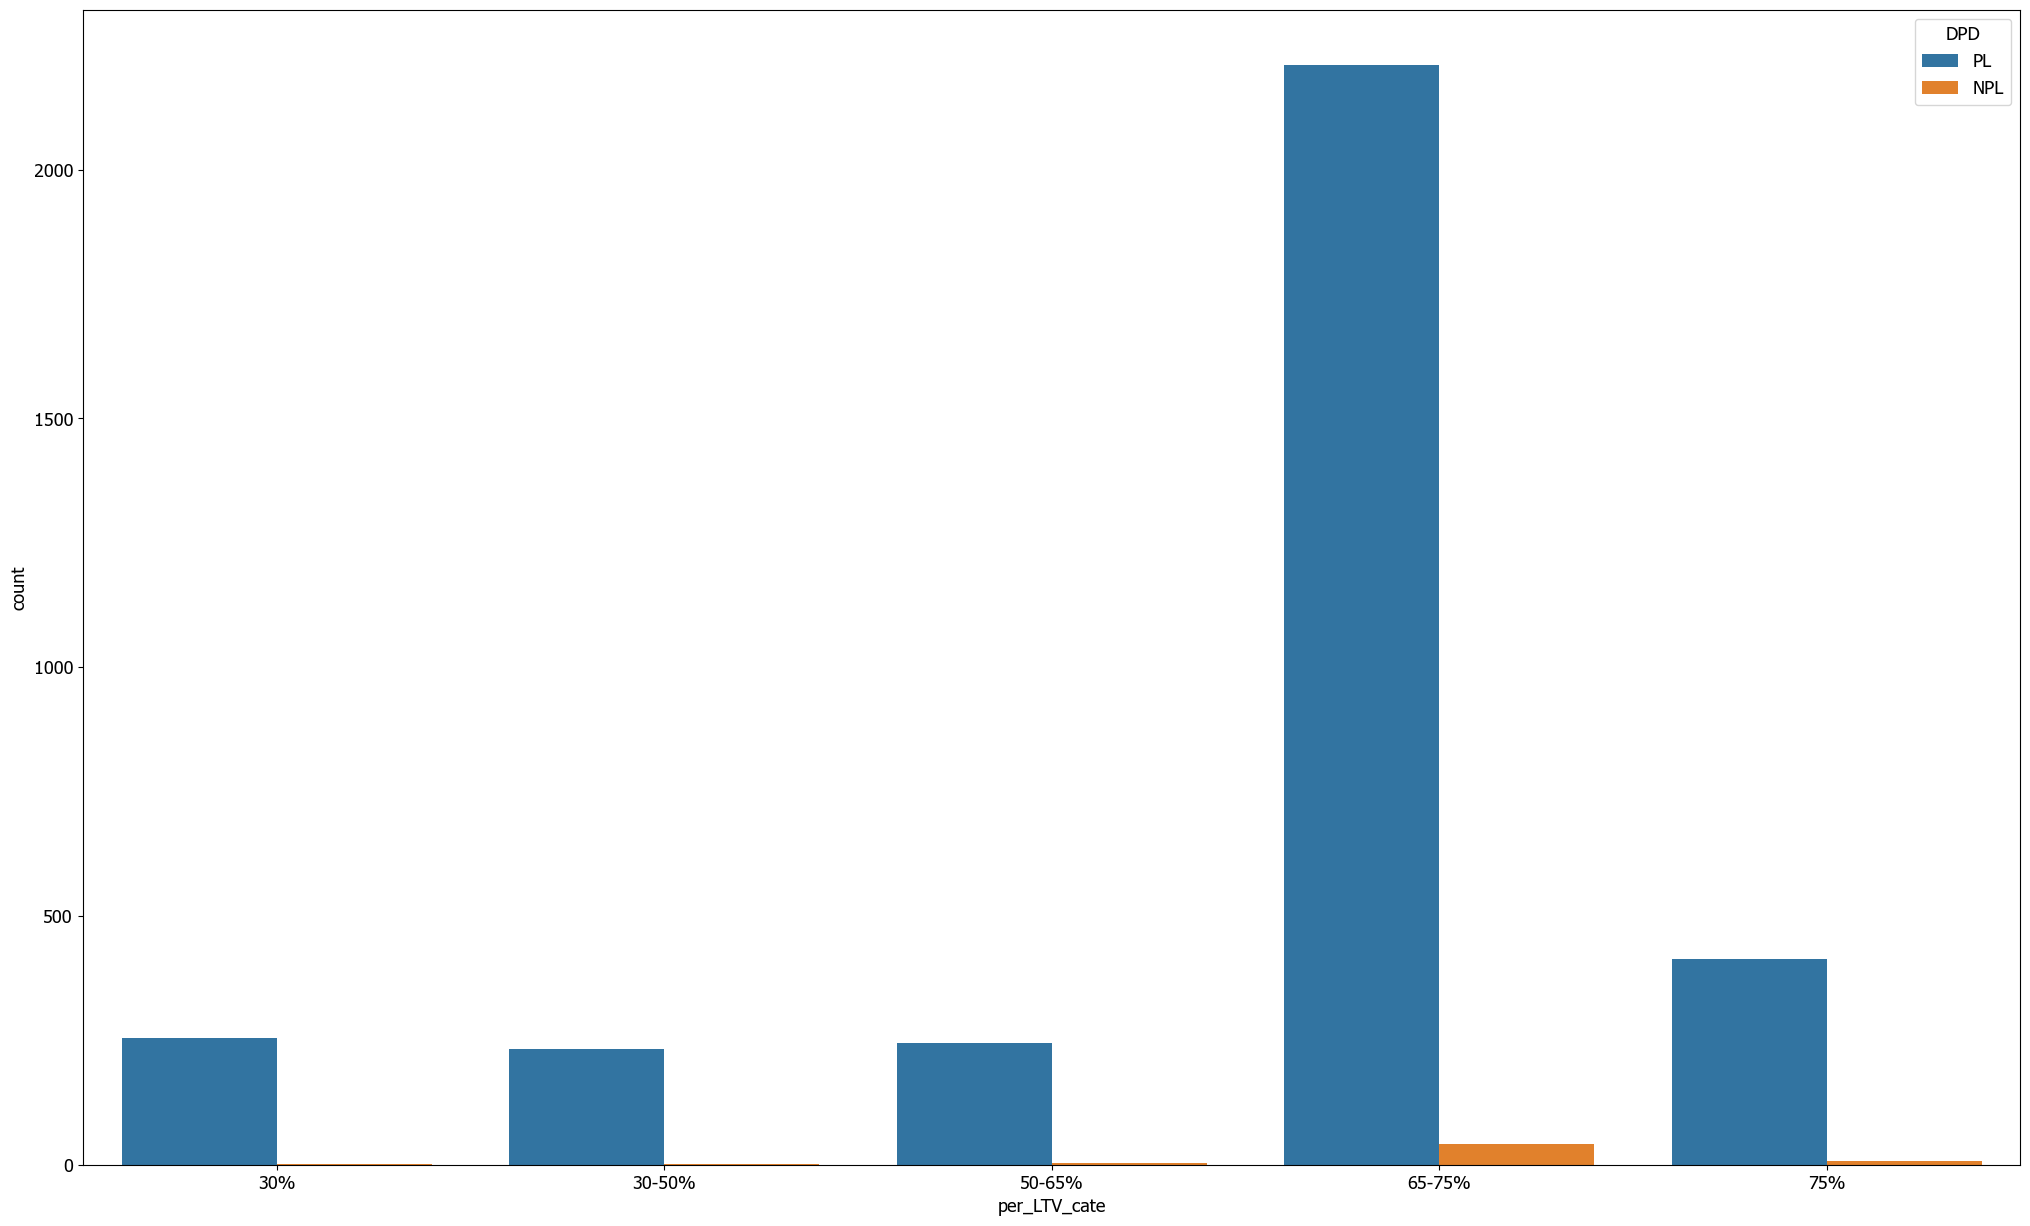

In [145]:
plt.figure(figsize=(25,15))
sns.countplot(data=df2, x="per_LTV_cate", hue="DPD")

In [146]:
# # perform one-hot encoding using pandas get_dummies function
# one_hot_encoded = pd.get_dummies(df2['Gender'])

# # combine the one-hot encoded dataframe with the original dataframe
# df2 = pd.concat([df2, one_hot_encoded], axis=1)

# # remove the original 'sex' column
# df2 = df2.drop('Gender', axis=1)

In [147]:
df2.head()

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

  Gender Occupation Description  Total Income Amount (Month)  \
0      F          STREET VENDOR                      20000.0   
1      M                  อื่นๆ                      14000.0   
2      F          พนักงานบริษัท                      15000.0   
3      F                เกษตรกร                      35000.0   
4      M          พนักงานบริษัท                      40000.0   

  Collateral Type Code Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                   PU        NISSAN  FRONTIER NAVARA                  2012   
1                  CAR        TOYOTA    COROLLA ALTIS                  2002   
2                   MC         HONDA       CLICK 150I                  2019   
3                   MC         HONDA          PCX 150                  2020   
4                   PU         ISUZU            D-MAX                  2013   

  Vehicle Sub Model  Evaluation Amount System CAR Code (Daily)  \
0                AD             283500                      S1   
1                AJ             111000                      S1   
2                BH              48500                      S1   
3                ED              76500                      S1   
4                BU             414500                      S1   

  System CAR Code Date Final CAR Code Previous Month DPD  age  Vehicle Age  \
0           2022-11-14                            S1  PL   44           11   
1           2022-09-06                            S1  PL   53           21   
2           2022-12-30                            S2  PL   32            4   
3           2022-11-12                            S1  PL   37            3   
4           2022-12-29                            S1  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

### Export CSV File

In [148]:
df2.to_csv('chaiyo_clean_90_v2.csv')

In [149]:
df2.shape

(3410, 20)

### Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','System CAR Code (Daily)','Final CAR Code Previous Month']

le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [151]:
df2.head(5)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   
2                   36000.0          35904.37                            24   
3                   30000.0          28813.69                            24   
4                  200000.0         200000.00                            36   

   Gender  Occupation Description  Total Income Amount (Month)  \
0       0                       0                      20000.0   
1       1                       6                      14000.0   
2       0                       3                      15000.0   
3       0                       7                      35000.0   
4       1                       3                      40000.0   

   Collateral Type Code  Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                     2             14  FRONTIER NAVARA                  2012   
1                     0             20    COROLLA ALTIS                  2002   
2                     1              5       CLICK 150I                  2019   
3                     1              5          PCX 150                  2020   
4                     2              7            D-MAX                  2013   

  Vehicle Sub Model  Evaluation Amount  System CAR Code (Daily)  \
0                AD             283500                        0   
1                AJ             111000                        0   
2                BH              48500                        0   
3                ED              76500                        0   
4                BU             414500                        0   

  System CAR Code Date  Final CAR Code Previous Month DPD  age  Vehicle Age  \
0           2022-11-14                              0  PL   44           11   
1           2022-09-06                              0  PL   53           21   
2           2022-12-30                              1  PL   32            4   
3           2022-11-12                              0  PL   37            3   
4           2022-12-29                              0  PL   57           10   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%  
2  74.226804       65-75%  
3  39.215686       30-50%  
4  48.250905       30-50%

In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Principal Approve Amount       3410 non-null   float64       
 1   Principal Amount               3410 non-null   float64       
 2   Repayment Tenor Month Number   3410 non-null   int32         
 3   Gender                         3410 non-null   int32         
 4   Occupation Description         3410 non-null   int32         
 5   Total Income Amount (Month)    3410 non-null   float64       
 6   Collateral Type Code           3410 non-null   int32         
 7   Vehicle Brand                  3410 non-null   int32         
 8   Vehicle Model                  3410 non-null   object        
 9   Vehicle Release Year           3410 non-null   int64         
 10  Vehicle Sub Model              3410 non-null   object        
 11  Evaluation Amount

In [153]:
corr = df2.corr()
corr

Principal Approve Amount  Principal Amount  \
Principal Approve Amount                       1.000000          0.999148   
Principal Amount                               0.999148          1.000000   
Repayment Tenor Month Number                   0.769579          0.773993   
Gender                                         0.058406          0.056938   
Occupation Description                        -0.065131         -0.065022   
Total Income Amount (Month)                    0.362215          0.360797   
Collateral Type Code                           0.229947          0.227933   
Vehicle Brand                                  0.282494          0.282009   
Vehicle Release Year                          -0.264901         -0.264737   
Evaluation Amount                              0.907540          0.904241   
System CAR Code (Daily)                        0.019772          0.024279   
Final CAR Code Previous Month                 -0.027121         -0.026276   
age                                            0.080608          0.079327   
Vehicle Age                                    0.264901          0.264737   
per_LTV                                        0.125286          0.128485   

                               Repayment Tenor Month Number    Gender  \
Principal Approve Amount                           0.769579  0.058406   
Principal Amount                                   0.773993  0.056938   
Repayment Tenor Month Number                       1.000000  0.013663   
Gender                                             0.013663  1.000000   
Occupation Description                            -0.059251  0.129259   
Total Income Amount (Month)                        0.247915  0.059345   
Collateral Type Code                               0.083003  0.109996   
Vehicle Brand                                      0.214181  0.033521   
Vehicle Release Year                              -0.318423 -0.069546   
Evaluation Amount                                  0.686341  0.080578   
System CAR Code (Daily)                            0.057858  0.025553   
Final CAR Code Previous Month                     -0.000241  0.015727   
age                                                0.041962  0.035896   
Vehicle Age                                        0.318423  0.069546   
per_LTV                                            0.153738 -0.080959   

                               Occupation Description  \
Principal Approve Amount                    -0.065131   
Principal Amount                            -0.065022   
Repayment Tenor Month Number                -0.059251   
Gender                                       0.129259   
Occupation Description                       1.000000   
Total Income Amount (Month)                 -0.229351   
Collateral Type Code                         0.091857   
Vehicle Brand                               -0.067278   
Vehicle Release Year                         0.025437   
Evaluation Amount                           -0.045079   
System CAR Code (Daily)                     -0.051652   
Final CAR Code Previous Month               -0.033092   
age                                          0.050555   
Vehicle Age                                 -0.025437   
per_LTV                                     -0.049492   

                               Total Income Amount (Month)  \
Principal Approve Amount                          0.362215   
Principal Amount                                  0.360797   
Repayment Tenor Month Number                      0.247915   
Gender                                            0.059345   
Occupation Description                           -0.229351   
Total Income Amount (Month)                       1.000000   
Collateral Type Code                              0.041323   
Vehicle Brand                                     0.146898   
Vehicle Release Year                             -0.148487   
Evaluation Amount                                 0.375999   
System CAR Code (Daily)           

<AxesSubplot:>

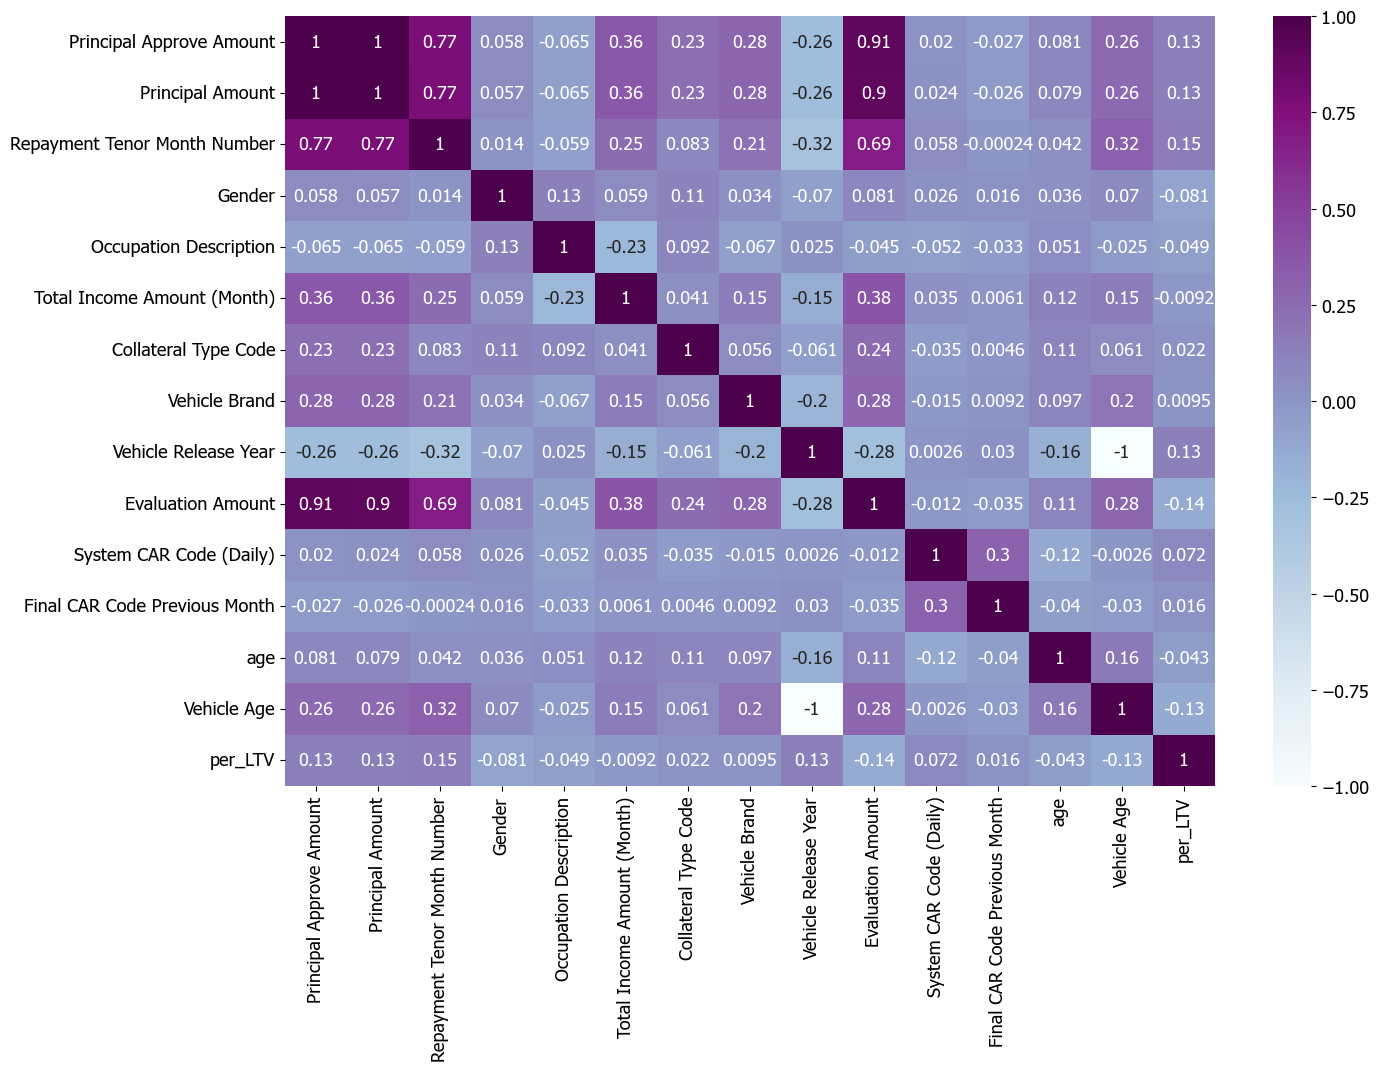

In [154]:
corr = df2.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

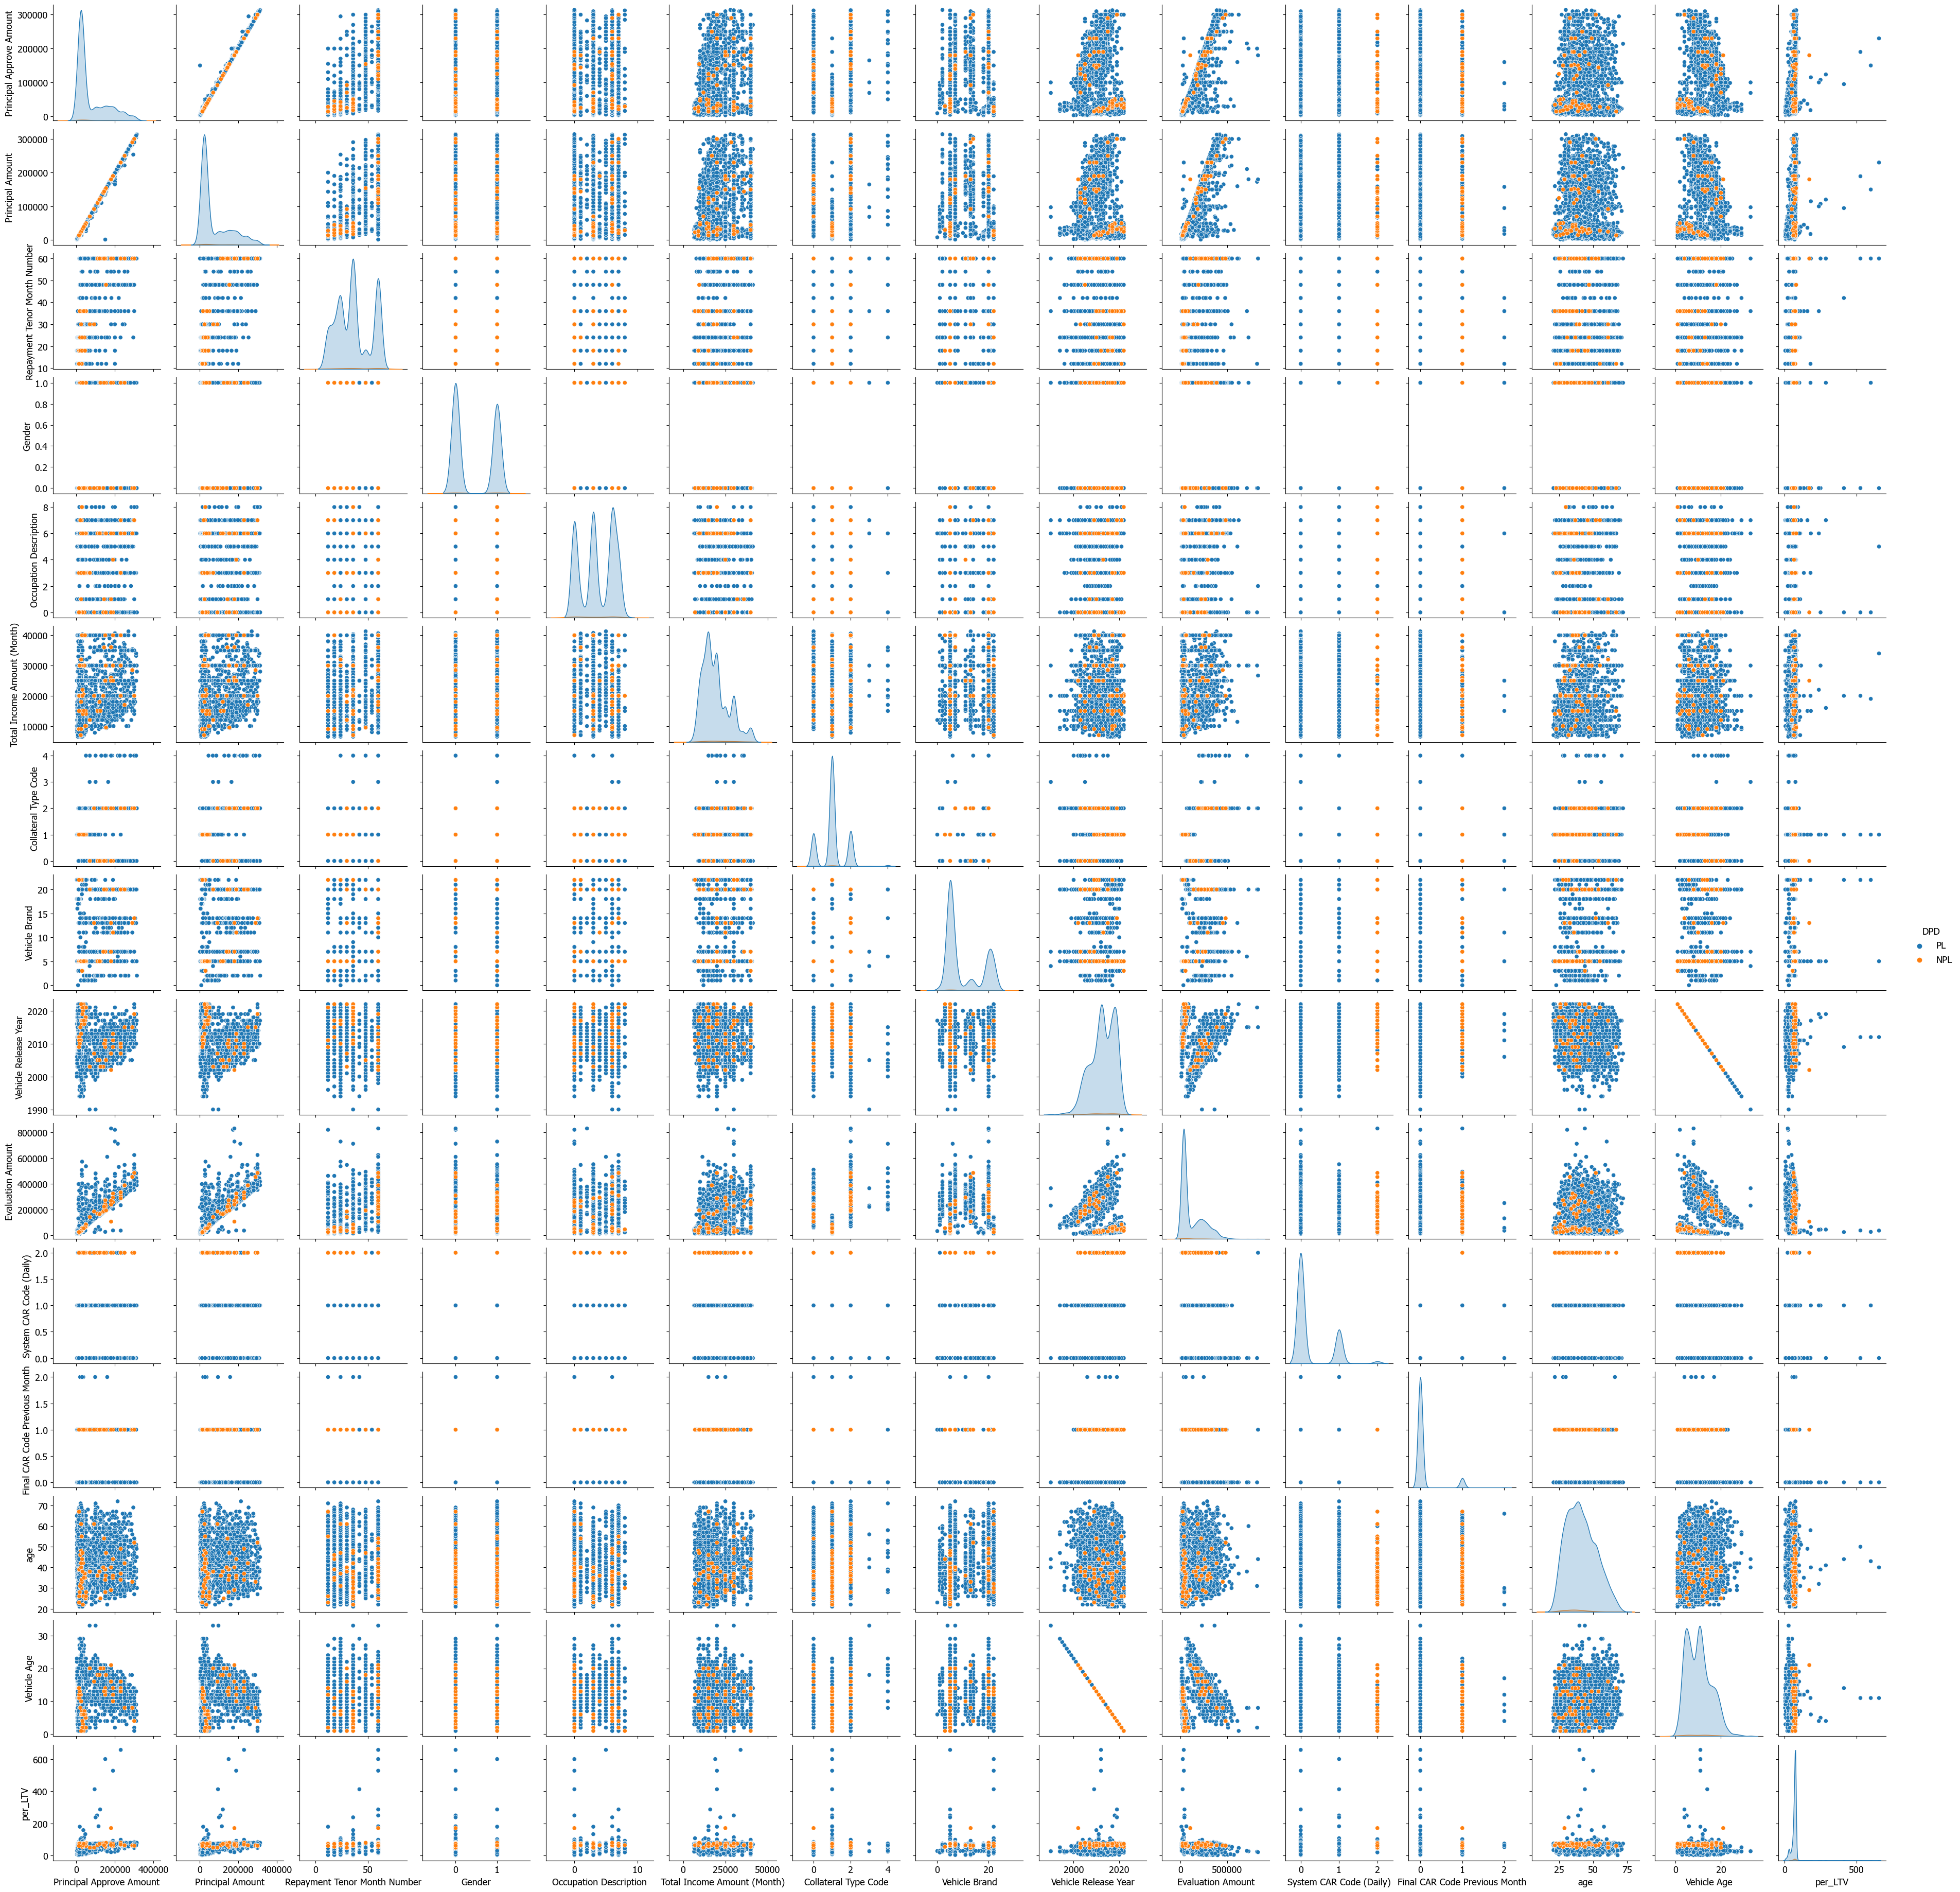

In [155]:
sns.pairplot(df2, hue="DPD")

### ทดลอง Feature Importance

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [157]:
df2.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age', 'per_LTV',
       'per_LTV_cate'],
      dtype='object')

In [158]:
df2.head(2)

Principal Approve Amount  Principal Amount  Repayment Tenor Month Number  \
0                  199000.0         199000.00                            60   
1                   60000.0          58822.04                            36   

   Gender  Occupation Description  Total Income Amount (Month)  \
0       0                       0                      20000.0   
1       1                       6                      14000.0   

   Collateral Type Code  Vehicle Brand    Vehicle Model  Vehicle Release Year  \
0                     2             14  FRONTIER NAVARA                  2012   
1                     0             20    COROLLA ALTIS                  2002   

  Vehicle Sub Model  Evaluation Amount  System CAR Code (Daily)  \
0                AD             283500                        0   
1                AJ             111000                        0   

  System CAR Code Date  Final CAR Code Previous Month DPD  age  Vehicle Age  \
0           2022-11-14                              0  PL   44           11   
1           2022-09-06                              0  PL   53           21   

     per_LTV per_LTV_cate  
0  70.194004       65-75%  
1  54.054054       50-65%

In [159]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'DOB',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'Application Status', 'age',
       'Vehicle Age'],
      dtype='object')

In [160]:
'''cols = ['Principal Approve Amount', 'Principal Amount',
       'Outstanding Balance Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Model',
       'Vehicle Release Year', 'Vehicle Sub Model', 'Evaluation Amount',
       'System CAR Code (Daily)','Final CAR Code Previous Month', 'age', 'Vehicle Age']'''

cols = ['Principal Approve Amount','Repayment Tenor Month Number','Gender','Occupation Description','Total Income Amount (Month)','Collateral Type Code','Vehicle Brand','Vehicle Release Year','Evaluation Amount','age','Vehicle Age']

In [161]:
X=df2[cols] #features
y = df2['DPD'] #label

In [162]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7
)

In [163]:
from sklearn import tree


In [164]:
model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [165]:
X_train.columns

Index(['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender',
       'Occupation Description', 'Total Income Amount (Month)',
       'Collateral Type Code', 'Vehicle Brand', 'Vehicle Release Year',
       'Evaluation Amount', 'age', 'Vehicle Age'],
      dtype='object')

### Feature Importance

In [166]:
model.feature_importances_

array([0.11149011, 0.01873446, 0.05718362, 0.06644042, 0.1451897 ,
       0.01331215, 0.04723571, 0.09091165, 0.25085756, 0.17346717,
       0.02517745])

In [167]:
fs = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
fs

Evaluation Amount               0.250858
age                             0.173467
Total Income Amount (Month)     0.145190
Principal Approve Amount        0.111490
Vehicle Release Year            0.090912
Occupation Description          0.066440
Gender                          0.057184
Vehicle Brand                   0.047236
Vehicle Age                     0.025177
Repayment Tenor Month Number    0.018734
Collateral Type Code            0.013312
dtype: float64

In [168]:
fs.sum()

0.9999999999999999

<AxesSubplot:>

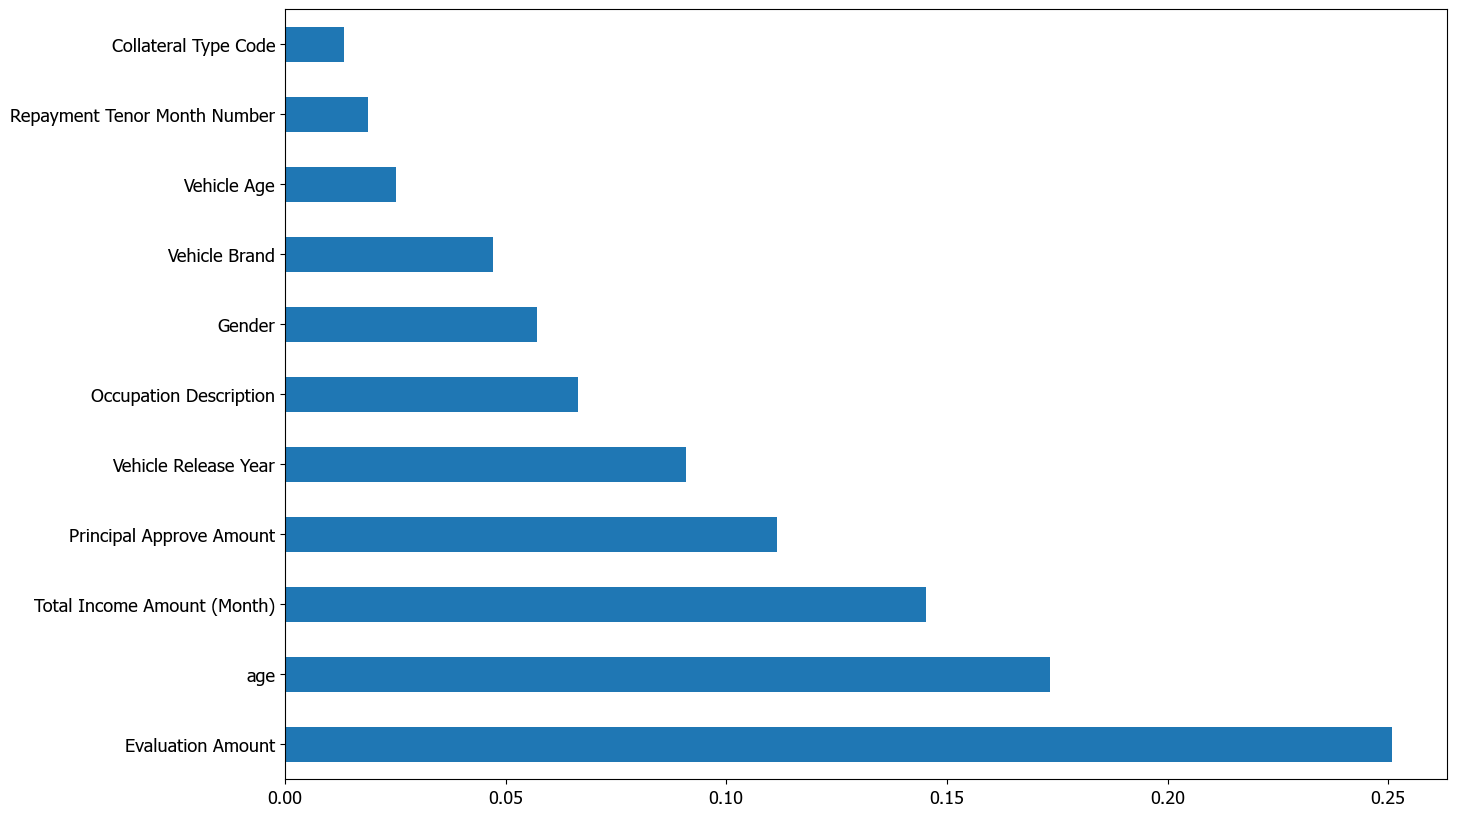

In [169]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

In [170]:
corr = df2.corr()
corr

Principal Approve Amount  Principal Amount  \
Principal Approve Amount                       1.000000          0.999148   
Principal Amount                               0.999148          1.000000   
Repayment Tenor Month Number                   0.769579          0.773993   
Gender                                         0.058406          0.056938   
Occupation Description                        -0.065131         -0.065022   
Total Income Amount (Month)                    0.362215          0.360797   
Collateral Type Code                           0.229947          0.227933   
Vehicle Brand                                  0.282494          0.282009   
Vehicle Release Year                          -0.264901         -0.264737   
Evaluation Amount                              0.907540          0.904241   
System CAR Code (Daily)                        0.019772          0.024279   
Final CAR Code Previous Month                 -0.027121         -0.026276   
age                                            0.080608          0.079327   
Vehicle Age                                    0.264901          0.264737   
per_LTV                                        0.125286          0.128485   

                               Repayment Tenor Month Number    Gender  \
Principal Approve Amount                           0.769579  0.058406   
Principal Amount                                   0.773993  0.056938   
Repayment Tenor Month Number                       1.000000  0.013663   
Gender                                             0.013663  1.000000   
Occupation Description                            -0.059251  0.129259   
Total Income Amount (Month)                        0.247915  0.059345   
Collateral Type Code                               0.083003  0.109996   
Vehicle Brand                                      0.214181  0.033521   
Vehicle Release Year                              -0.318423 -0.069546   
Evaluation Amount                                  0.686341  0.080578   
System CAR Code (Daily)                            0.057858  0.025553   
Final CAR Code Previous Month                     -0.000241  0.015727   
age                                                0.041962  0.035896   
Vehicle Age                                        0.318423  0.069546   
per_LTV                                            0.153738 -0.080959   

                               Occupation Description  \
Principal Approve Amount                    -0.065131   
Principal Amount                            -0.065022   
Repayment Tenor Month Number                -0.059251   
Gender                                       0.129259   
Occupation Description                       1.000000   
Total Income Amount (Month)                 -0.229351   
Collateral Type Code                         0.091857   
Vehicle Brand                               -0.067278   
Vehicle Release Year                         0.025437   
Evaluation Amount                           -0.045079   
System CAR Code (Daily)                     -0.051652   
Final CAR Code Previous Month               -0.033092   
age                                          0.050555   
Vehicle Age                                 -0.025437   
per_LTV                                     -0.049492   

                               Total Income Amount (Month)  \
Principal Approve Amount                          0.362215   
Principal Amount                                  0.360797   
Repayment Tenor Month Number                      0.247915   
Gender                                            0.059345   
Occupation Description                           -0.229351   
Total Income Amount (Month)                       1.000000   
Collateral Type Code                              0.041323   
Vehicle Brand                                     0.146898   
Vehicle Release Year                             -0.148487   
Evaluation Amount                                 0.375999   
System CAR Code (Daily)           

<AxesSubplot:>

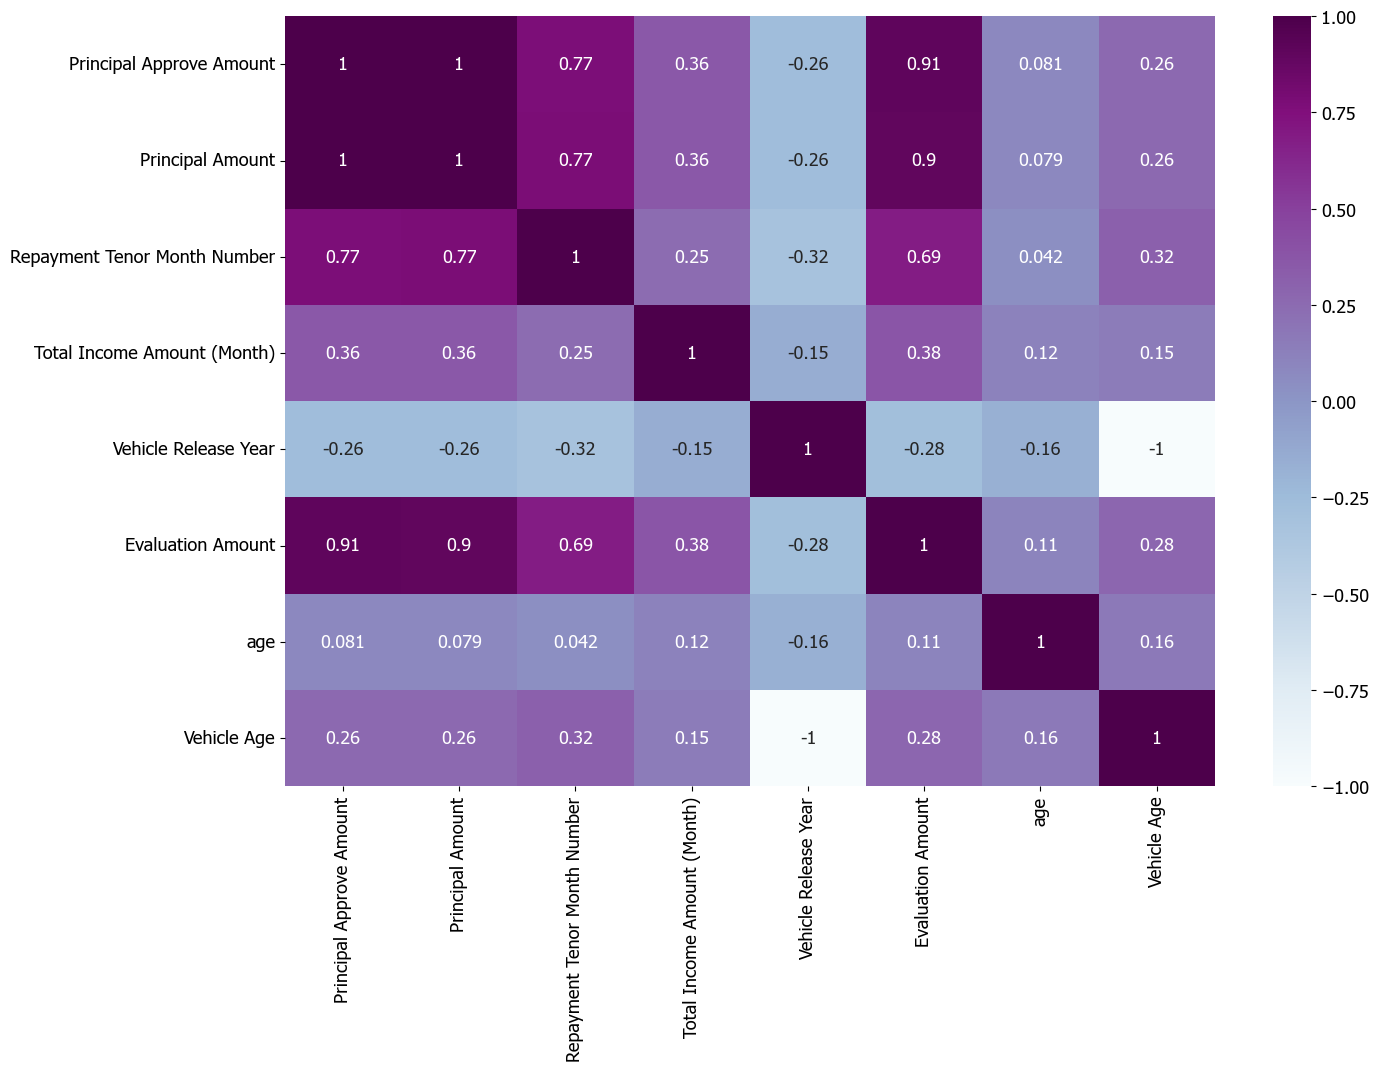

In [171]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="BuPu")

In [172]:
df2

Principal Approve Amount  Principal Amount  \
0                     199000.0         199000.00   
1                      60000.0          58822.04   
2                      36000.0          35904.37   
3                      30000.0          28813.69   
4                     200000.0         200000.00   
...                        ...               ...   
4024                   14000.0          14000.00   
4025                   45000.0          45000.00   
4027                  144000.0         144000.00   
4029                   39000.0          39000.00   
4030                  300000.0         300000.00   

      Repayment Tenor Month Number  Gender  Occupation Description  \
0                               60       0                       0   
1                               36       1                       6   
2                               24       0                       3   
3                               24       0                       7   
4                               36       1                       3   
...                            ...     ...                     ...   
4024                            12       0                       0   
4025                            18       0                       3   
4027                            60       1                       1   
4029                            36       0                       3   
4030                            60       0                       7   

      Total Income Amount (Month)  Collateral Type Code  Vehicle Brand  \
0                         20000.0                     2             14   
1                         14000.0                     0             20   
2                         15000.0                     1              5   
3                         35000.0                     1              5   
4                         40000.0                     2              7   
...                           ...                   ...            ...   
4024                      15000.0                     1             22   
4025                      40000.0                     1              5   
4027                      36000.0                     0             20   
4029                      15000.0                     1              5   
4030                      20000.0                     2             14   

        Vehicle Model  Vehicle Release Year Vehicle Sub Model  \
0     FRONTIER NAVARA                  2012                AD   
1       COROLLA ALTIS                  2002                AJ   
2          CLICK 150I                  2019                BH   
3             PCX 150                  2020                ED   
4               D-MAX                  2013                BU   
...               ...                   ...               ...   
4024     FINO (MLEKE)                  2009                AH   
4025          PCX 150                  2017                CQ   
4027             VIOS                  2010                DX   
4029       DREAM 110I                  2017                CO   
4030           NAVARA                  2019                DQ   

      Evaluation Amount  System CAR Code (Daily) System CAR Code Date  \
0                283500                        0           2022-11-14   
1                111000                        0           2022-09-06   
2                 48500                        0           2022-12-30   
3                 76500                        0           2022-11-12   
4                414500                        0           2022-12-29   
...                 ...                      ...                  ...   
4024              23000                        2           2022-12-24   
4025              61500                        2           2022-12-27   
4027             222000                        2           2022-12-29   
4029              53000                        2           2022-12-29   
4030             484500                        2           2022-12-

# Evaluation

### Drop Cplomns ที่ไม่ใช้ออก

In [173]:
cols = ['Principal Approve Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year',
       'Evaluation Amount','age','Vehicle Age']
#cols = ['System CAR Code (Daily)','Final CAR Code Previous Month','Vehicle Model','Vehicle Sub Model']
df2 = cols
df2.head()

AttributeError: 'list' object has no attribute 'head'

In [ ]:
X = df2
y = df2['DPD']

TypeError: list indices must be integers or slices, not str

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [ ]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    model.fit(X_train, y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    return model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

In [ ]:
model = ExtraTreesClassifier()
classify(model,X,y)

In [ ]:
X_train.value_counts()

In [ ]:
X_test.value_counts()

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
df2.columns

In [ ]:
#X = df2[['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age']]
X = df2[['Principal Approve Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','Evaluation Amount', 'age', 'Vehicle Age']]
y = df2['DPD']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X ,y ,test_size=0.2, random_state=0)
X_train.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(X_train,y_train)
classifier

In [ ]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
df2.columns

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,25))
tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Approve Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','Evaluation Amount', 'age', 'Vehicle Age'],  
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True,fontsize=10)

In [ ]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(classifier, 
                   #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                   feature_names=['Principal Approve Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','Evaluation Amount', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True, fontsize=10)

In [ ]:
import graphviz

In [ ]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                #feature_names=['Principal Amount','Outstanding Balance Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand', 'age', 'Vehicle Age'],  
                                feature_names=['Principal Approve Amount','Repayment Tenor Month Number', 'Gender', 'Occupation Description','Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Release Year','Evaluation Amount', 'age', 'Vehicle Age'],
                                class_names=['NPL','PL'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Deployment

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d')